# 1.Load the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)#Setting column display limit
pd.set_option('display.max_columns', 30) #Setting column display limit

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

In [4]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 2.Load the data

In [5]:
lead=pd.read_csv("Leads.csv")

## 3.View the data

In [6]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,...,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,...,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,...,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,...,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,...,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 4.Basic information of data

In [7]:
lead.shape

(9240, 37)

In [8]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
lead.duplicated().sum()

0

In [11]:
numerical=[ var for var in lead.columns if lead[var].dtype !="O"]
categorical=[ var for var in lead.columns if lead[var].dtype =="O"]
print('current numerical variables',len(numerical))
print('current categotical variables',len(categorical))

current numerical variables 7
current categotical variables 30


In [12]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [13]:
null=(lead.isnull().sum()/len(lead)*100).sort_values(ascending=False)
null

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

## Observation

a)shape  
9240 rows and 37) columns

b)datatypes
dtypes: float64(4), int64(3), object(30)

current numerical variables 7
current categotical variables 30

c)negative columns
No negative columns

d)Duplicates
No duplicates

Null Value

many columns have null percentage more than 35%
Many places data is mentiones as  select which need to be changed 

## 5 Data Preparation

### 5.1 converting select to NaN

In [14]:

lead['Specialization'] = lead['Specialization'].replace('Select', np.nan)
lead['How did you hear about X Education'] = lead['How did you hear about X Education'].replace('Select', np.nan)
lead['Lead Profile'] = lead['Lead Profile'].replace('Select', np.nan)
lead['City'] = lead['City'].replace('Select', np.nan)

In [15]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,...,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,...,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,...,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,...,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,...,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [16]:
null=(lead.isnull().sum()/len(lead)*100).sort_values(ascending=False) # calculating null %
null.head(60)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

### 5.2 Removing null columns

In [17]:
sum_null=lead.isnull().sum()
mean_null=lead.isnull().mean()
curr_nulls=pd.concat([sum_null,mean_null],axis=1)
curr_nulls.rename(columns={0:'count',1:'percentage'},inplace=True)


In [18]:
null_35=curr_nulls[curr_nulls['percentage']>0.35]
print(len(null_35))                                     #removing columns with null % above 35%
lead.drop(null_35.index,axis=1,inplace=True)
print(lead.shape)


10
(9240, 27)


In [19]:
null=(lead.isnull().sum()/len(lead)*100).sort_values(ascending=False)
null.head(60)

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
X Education Forums                                0.000000
A free copy of Mastering The Interview            0.000000
I agree to pay the amount through cheque          0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
Prospect ID                                       0.0000

In [20]:
#Handling null % between 35% to 2 %

# Replacing NaN with mode

In [21]:
lead['What matters most to you in choosing a course'].value_counts(dropna=False)


Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [22]:
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects') 

In [23]:
lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [24]:

lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [25]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed') 

lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [26]:
lead['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [27]:
lead['Country'] = lead['Country'].replace(np.nan,'India') #since no info
lead['Country'].value_counts(dropna=False)

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [28]:
lead['TotalVisits'].value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [29]:
lead['Page Views Per Visit'].value_counts(dropna=False)

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: Page Views Per Visit, Length: 115, dtype: int64

In [30]:
lead['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [31]:
lead['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [32]:
lead['Lead Source'] = lead['Lead Source'].replace('google', 'Google') #google and Google is combined


In [33]:
lead['Lead Source'].value_counts(dropna=False)

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [34]:
null=(lead.isnull().sum()/len(lead)*100).sort_values(ascending=False)
null.head(60)

TotalVisits                                      1.482684
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Lead Source                                      0.389610
Prospect ID                                      0.000000
Newspaper Article                                0.000000
A free copy of Mastering The Interview           0.000000
I agree to pay the amount through cheque         0.000000
Get updates on DM Content                        0.000000
Update me on Supply Chain Content                0.000000
Receive More Updates About Our Courses           0.000000
Through Recommendations                          0.000000
Digital Advertisement                            0.000000
Newspaper                                        0.000000
X Education Forums                               0.000000
What matters most to you in choosing a course    0.000000
Magazine                                         0.000000
Search        

In [35]:
lead.shape

(9240, 27)

In [36]:
# Null values with less than 2% rows are dropped

In [37]:
round(lead.isnull().sum()/len(lead.index),2)*100   # Finding the null percentages across columns

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      1.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             1.0
Last Activity                                    1.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [38]:
lead.dropna(inplace=True) 

In [39]:
null=(lead.isnull().sum()/len(lead)*100).sort_values(ascending=False)
null.head(60)

Prospect ID                                      0.0
Search                                           0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
What matters most to you in choosing a course    0.0
Lead Number                                      0.0
What is your current occupation                  0.0
Country                                          0.0
Last Activity                                    0.0
Page Views Per Visit                          

In [40]:
(len(lead.index)/9240)*100   # Percentage of rows retained 

98.2034632034632

In [41]:
lead

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,SMS Sent


### 5.3 Converting  columns with Yes/No to 1/0

In [42]:
# Converting  columns with Yes/No to 1/0

for feature in['Do Not Email', 'Do Not Call','Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview',]:
    lead[feature]=lead[feature].apply(lambda x:1 if x=="Yes" else 0)
lead.head()    

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Modified


In [43]:
lead.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.0,9074.000000
mean,617032.619352,0.078907,0.000220,0.378554,3.456028,482.887481,2.370151,0.001543,0.0,0.000220,0.000110,0.000110,0.000441,0.000771,0.0,0.0,0.0,0.0,0.318272
std,23348.029512,0.269608,0.014845,0.485053,4.858802,545.256560,2.160871,0.039251,0.0,0.014845,0.010498,0.010498,0.020992,0.027766,0.0,0.0,0.0,0.0,0.465831
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,596406.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,615278.500000,0.000000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,637176.500000,0.000000,0.000000,1.000000,5.000000,922.750000,3.200000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,660737.000000,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


In [44]:
#dropping all columns with min and max value 0

lead = lead.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [45]:
lead.shape

(9074, 22)

### 5.4 Handling Outliers

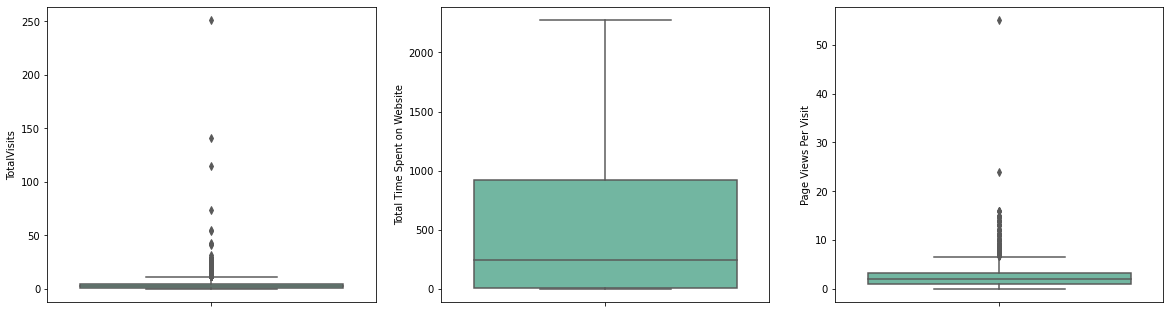

In [46]:
#plotting the columns with huge difference
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set2', data = lead)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set2', data = lead)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set2', data = lead)
plt.show()

### Observation

TotalVisits	Total Time Spent on Website	Page Views Per Visit have large difference in Max and 75%


In [47]:
percentiles = lead['TotalVisits'].quantile([0.05,0.95]).values
lead['TotalVisits'][lead['TotalVisits'] <= percentiles[0]] = percentiles[0]  #Adjusting the outliers
lead['TotalVisits'][lead['TotalVisits'] >= percentiles[1]] = percentiles[1] 

In [48]:
percentiles = lead['Total Time Spent on Website'].quantile([0.05,0.95]).values
lead['Total Time Spent on Website'][lead['Total Time Spent on Website'] <= percentiles[0]] = percentiles[0]
lead['Total Time Spent on Website'][lead['Total Time Spent on Website'] >= percentiles[1]] = percentiles[1]

In [49]:
percentiles = lead['Page Views Per Visit'].quantile([0.05,0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

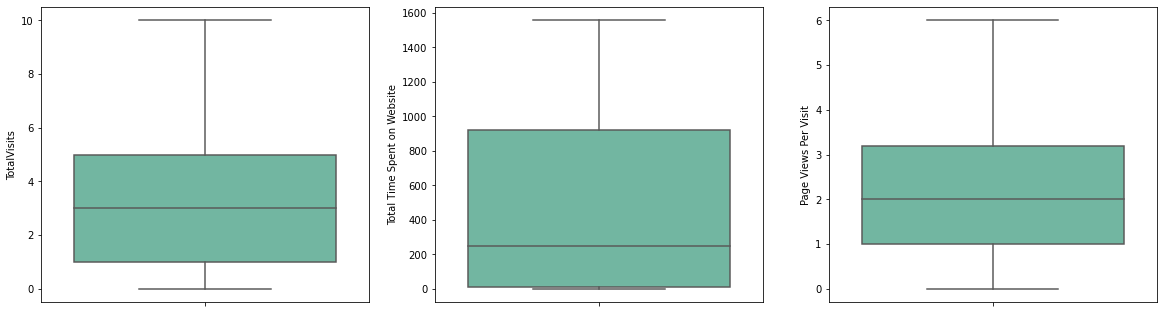

In [50]:
plt.figure(figsize=(20, 25))   #Plotting after adjusting the outliers
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set2', data = lead)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set2', data = lead)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set2', data = lead)
plt.show()

In [51]:
lead.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.078907,0.000220,0.378554,3.191867,474.472559,2.265943,0.001543,0.000220,0.000110,0.000110,0.000441,0.000771,0.318272
std,23348.029512,0.269608,0.014845,0.485053,2.780618,526.060205,1.790991,0.039251,0.014845,0.010498,0.010498,0.020992,0.027766,0.465831
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615278.500000,0.000000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637176.500000,0.000000,0.000000,1.000000,5.000000,922.750000,3.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,660737.000000,1.000000,1.000000,1.000000,10.000000,1557.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



## 6 Exploratory Data Analysis

In [52]:
lead.shape

(9074, 22)

### 6.1 Imbalance Analysis

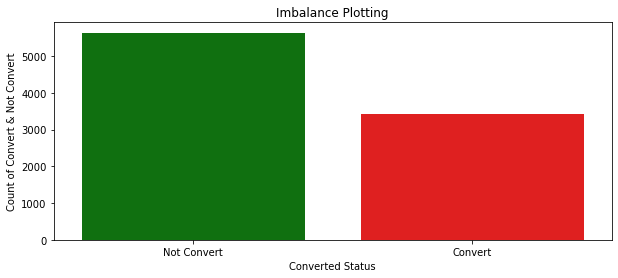

In [53]:
Imbalance=lead["Converted"].value_counts().reset_index()
plt.figure(figsize=(10,4))
x=['Not Convert','Convert']
sns.barplot(x,"Converted",data=Imbalance,palette=['g','r'])
plt.xlabel("Converted Status")
plt.ylabel("Count of Convert & Not Convert")
plt.title("Imbalance Plotting")
plt.show()

In [54]:
count_0=Imbalance.iloc[0]["Converted"]
count_1=Imbalance.iloc[1]["Converted"]
count_0_perc=round(count_0/(count_0+count_1)*100,2)
count_1_perc=round(count_1/(count_0+count_1)*100,2)
print(count_0_perc,count_1_perc)
print(count_0/count_1)

62.14 37.86
1.6416302765647743


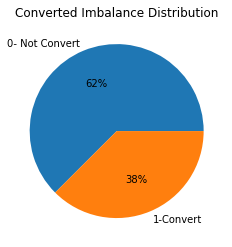

In [55]:
labels='0- Not Convert','1-Convert'
data=[62.49, 37.51]
plt.pie(data,labels=labels,autopct='%.0f%%')
plt.title('Converted Imbalance Distribution')
plt.show()

In [56]:
lead["Converted"].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

### Observation 

Highly imbalanced with 62 % not convert and 38% convert.

### 6.2 Analysis of Categorical Columns

In [57]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   int64  
 5   Do Not Call                                    9074 non-null   int64  
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [58]:
numerical=[ var for var in lead.columns if lead[var].dtype !="O"]
categorical=[ var for var in lead.columns if lead[var].dtype =="O"]
print('current numerical variables',len(numerical))
print('current categotical variables',len(categorical))

current numerical variables 14
current categotical variables 8


In [59]:
categorical_col=['Lead Origin','Lead Source','Last Activity','Country','What is your current occupation','What matters most to you in choosing a course',
 'Last Notable Activity']


In [60]:
#univariate analysis

In [61]:
NotConvert=lead.loc[lead["Converted"]==0]
Convert=lead.loc[lead["Converted"]==1]

def categorical_plot(var):
    plt.figure(figsize=(40,20))
    
    plt.rcParams['axes.labelpad']=50
    plt.subplot(1,2,1)
    sns.countplot(var,data=NotConvert, palette='Set3', hue='Converted')
    plt.xlabel(var, fontsize=30, fontweight="bold")
    plt.ylabel('Count',fontsize=30, fontweight="bold")      #Not Convert
    plt.xticks(rotation=90,fontsize=30)
    plt.yticks(rotation=360,fontsize=30)
    
    
    
    plt.rcParams['axes.labelpad']=50
    plt.subplot(1,2,2)
    sns.countplot(var,data=Convert, palette='Set1', hue='Converted')
    plt.xlabel(var, fontsize=30, fontweight="bold")
    plt.ylabel('Count',fontsize=30, fontweight="bold")   #Convert
    plt.xticks(rotation=90,fontsize=30)
    plt.yticks(rotation=360,fontsize=30)
    plt.show()

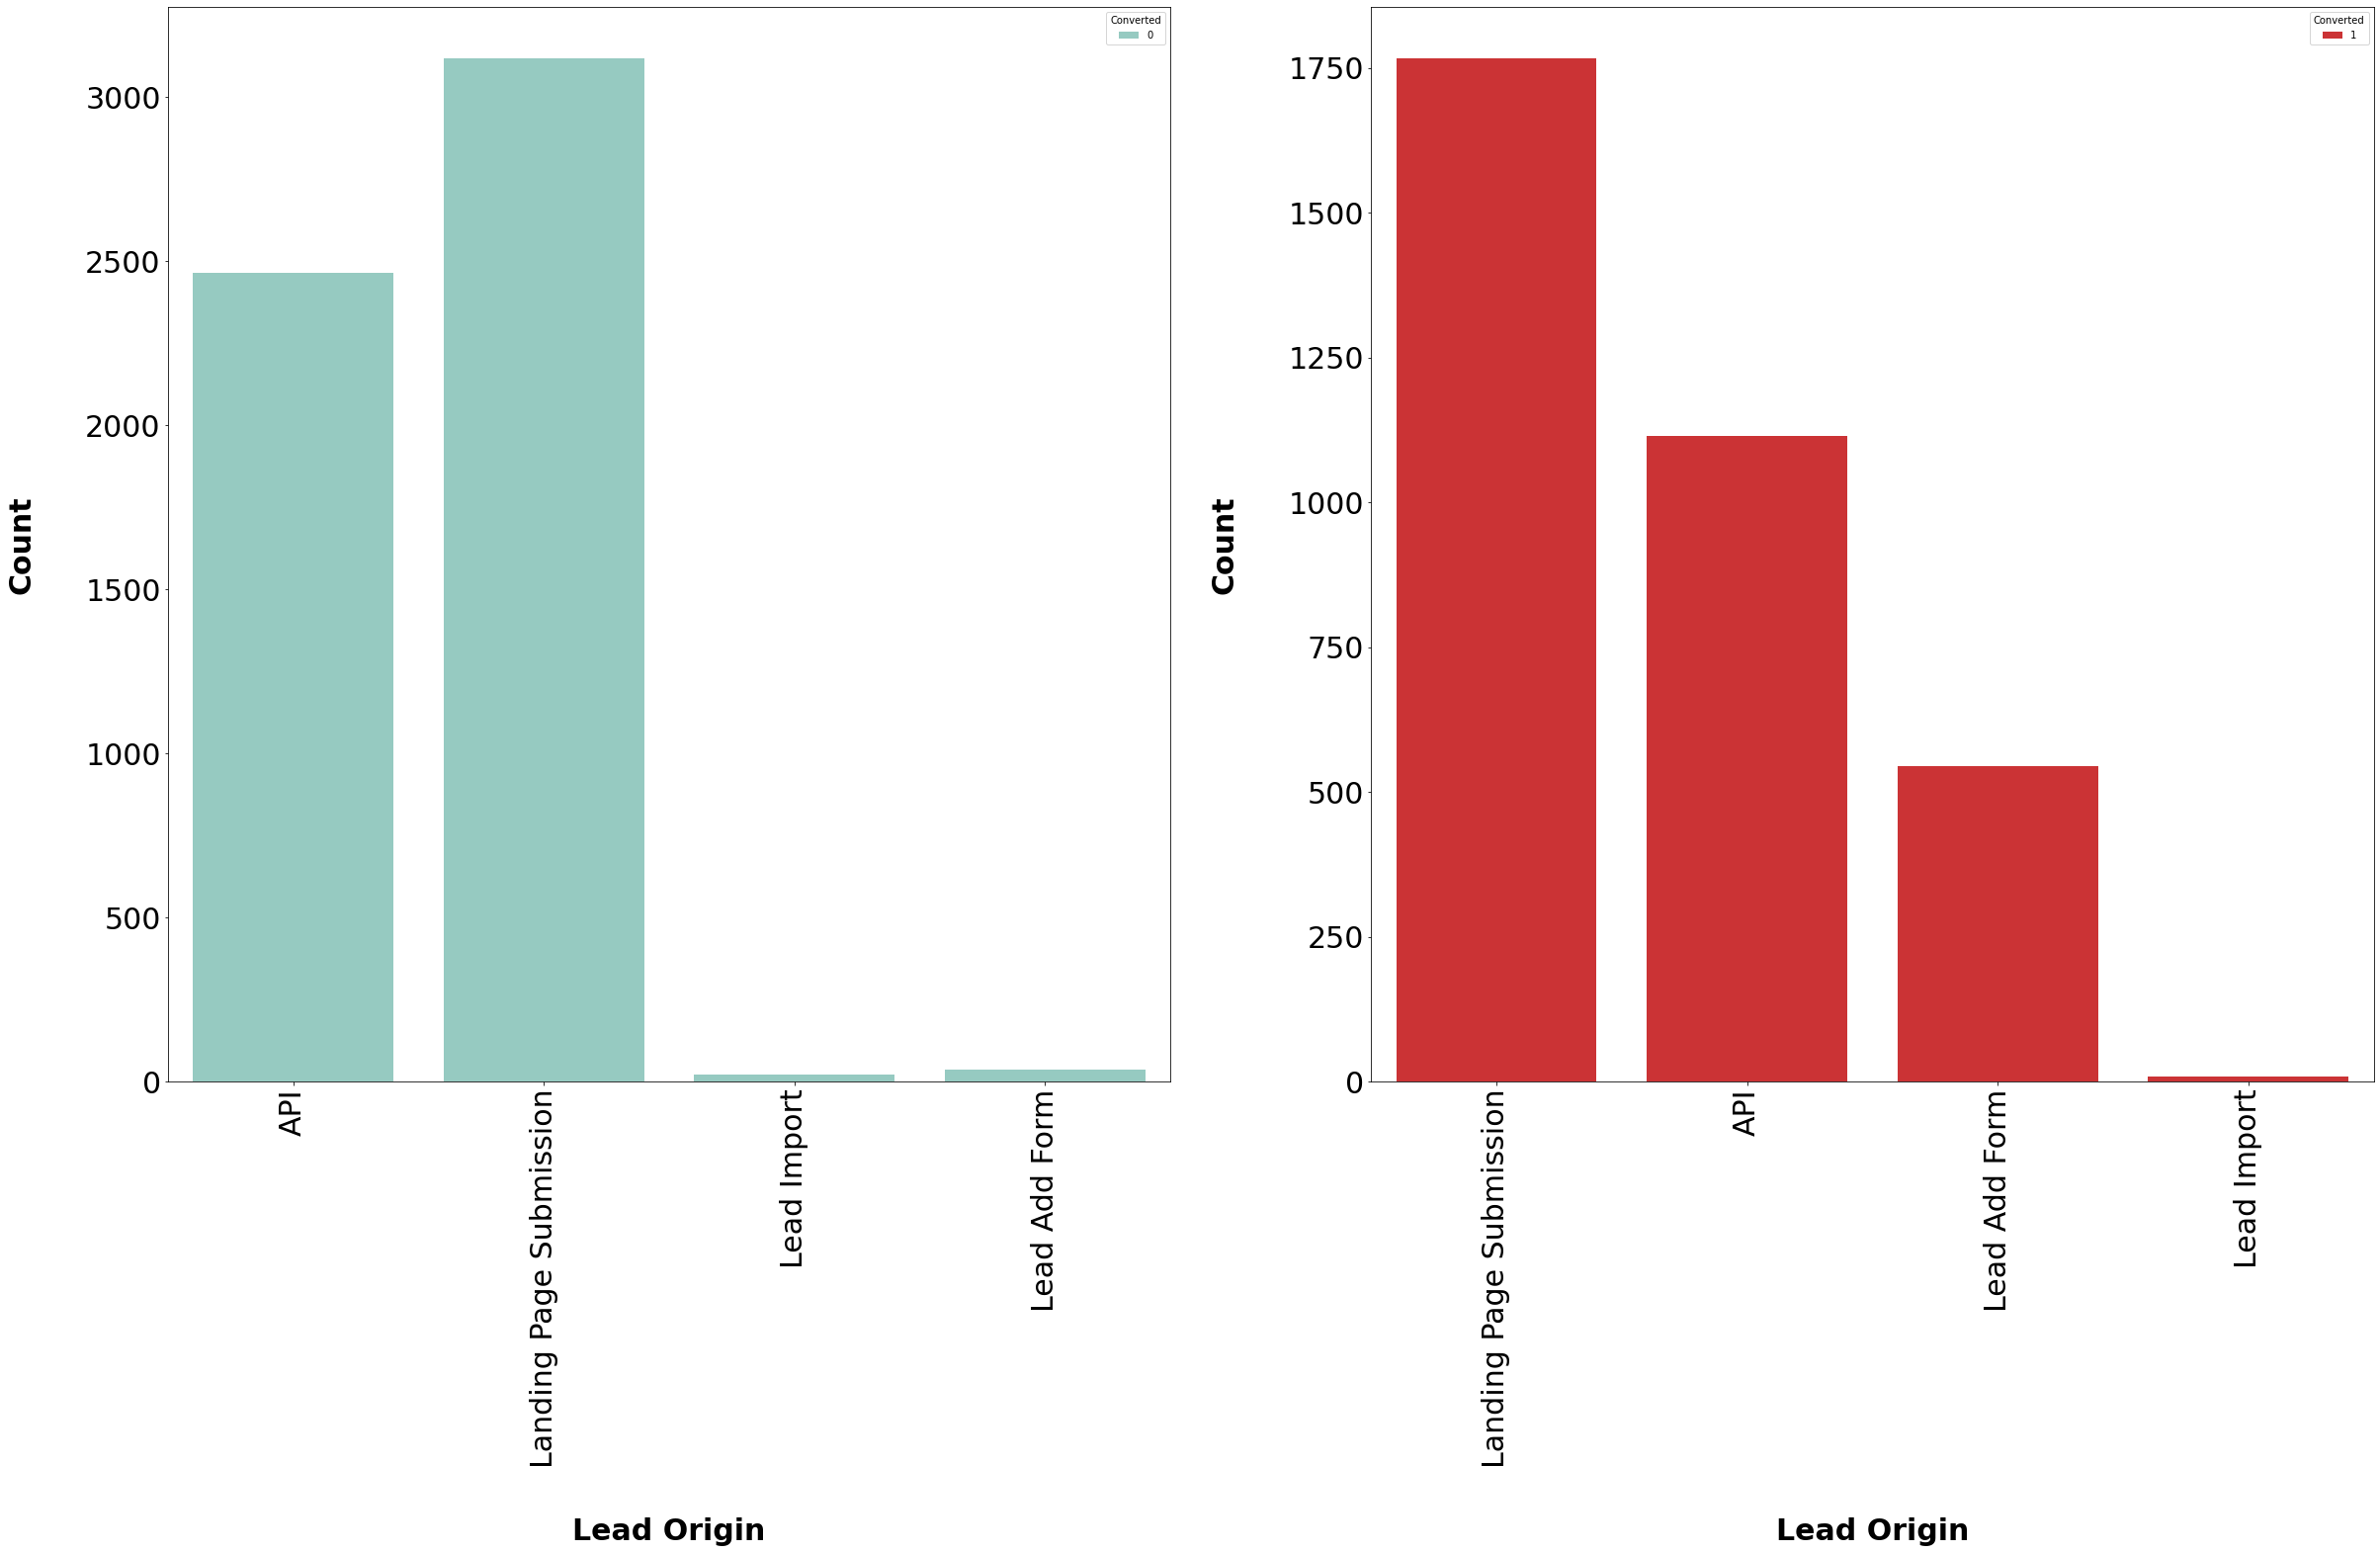

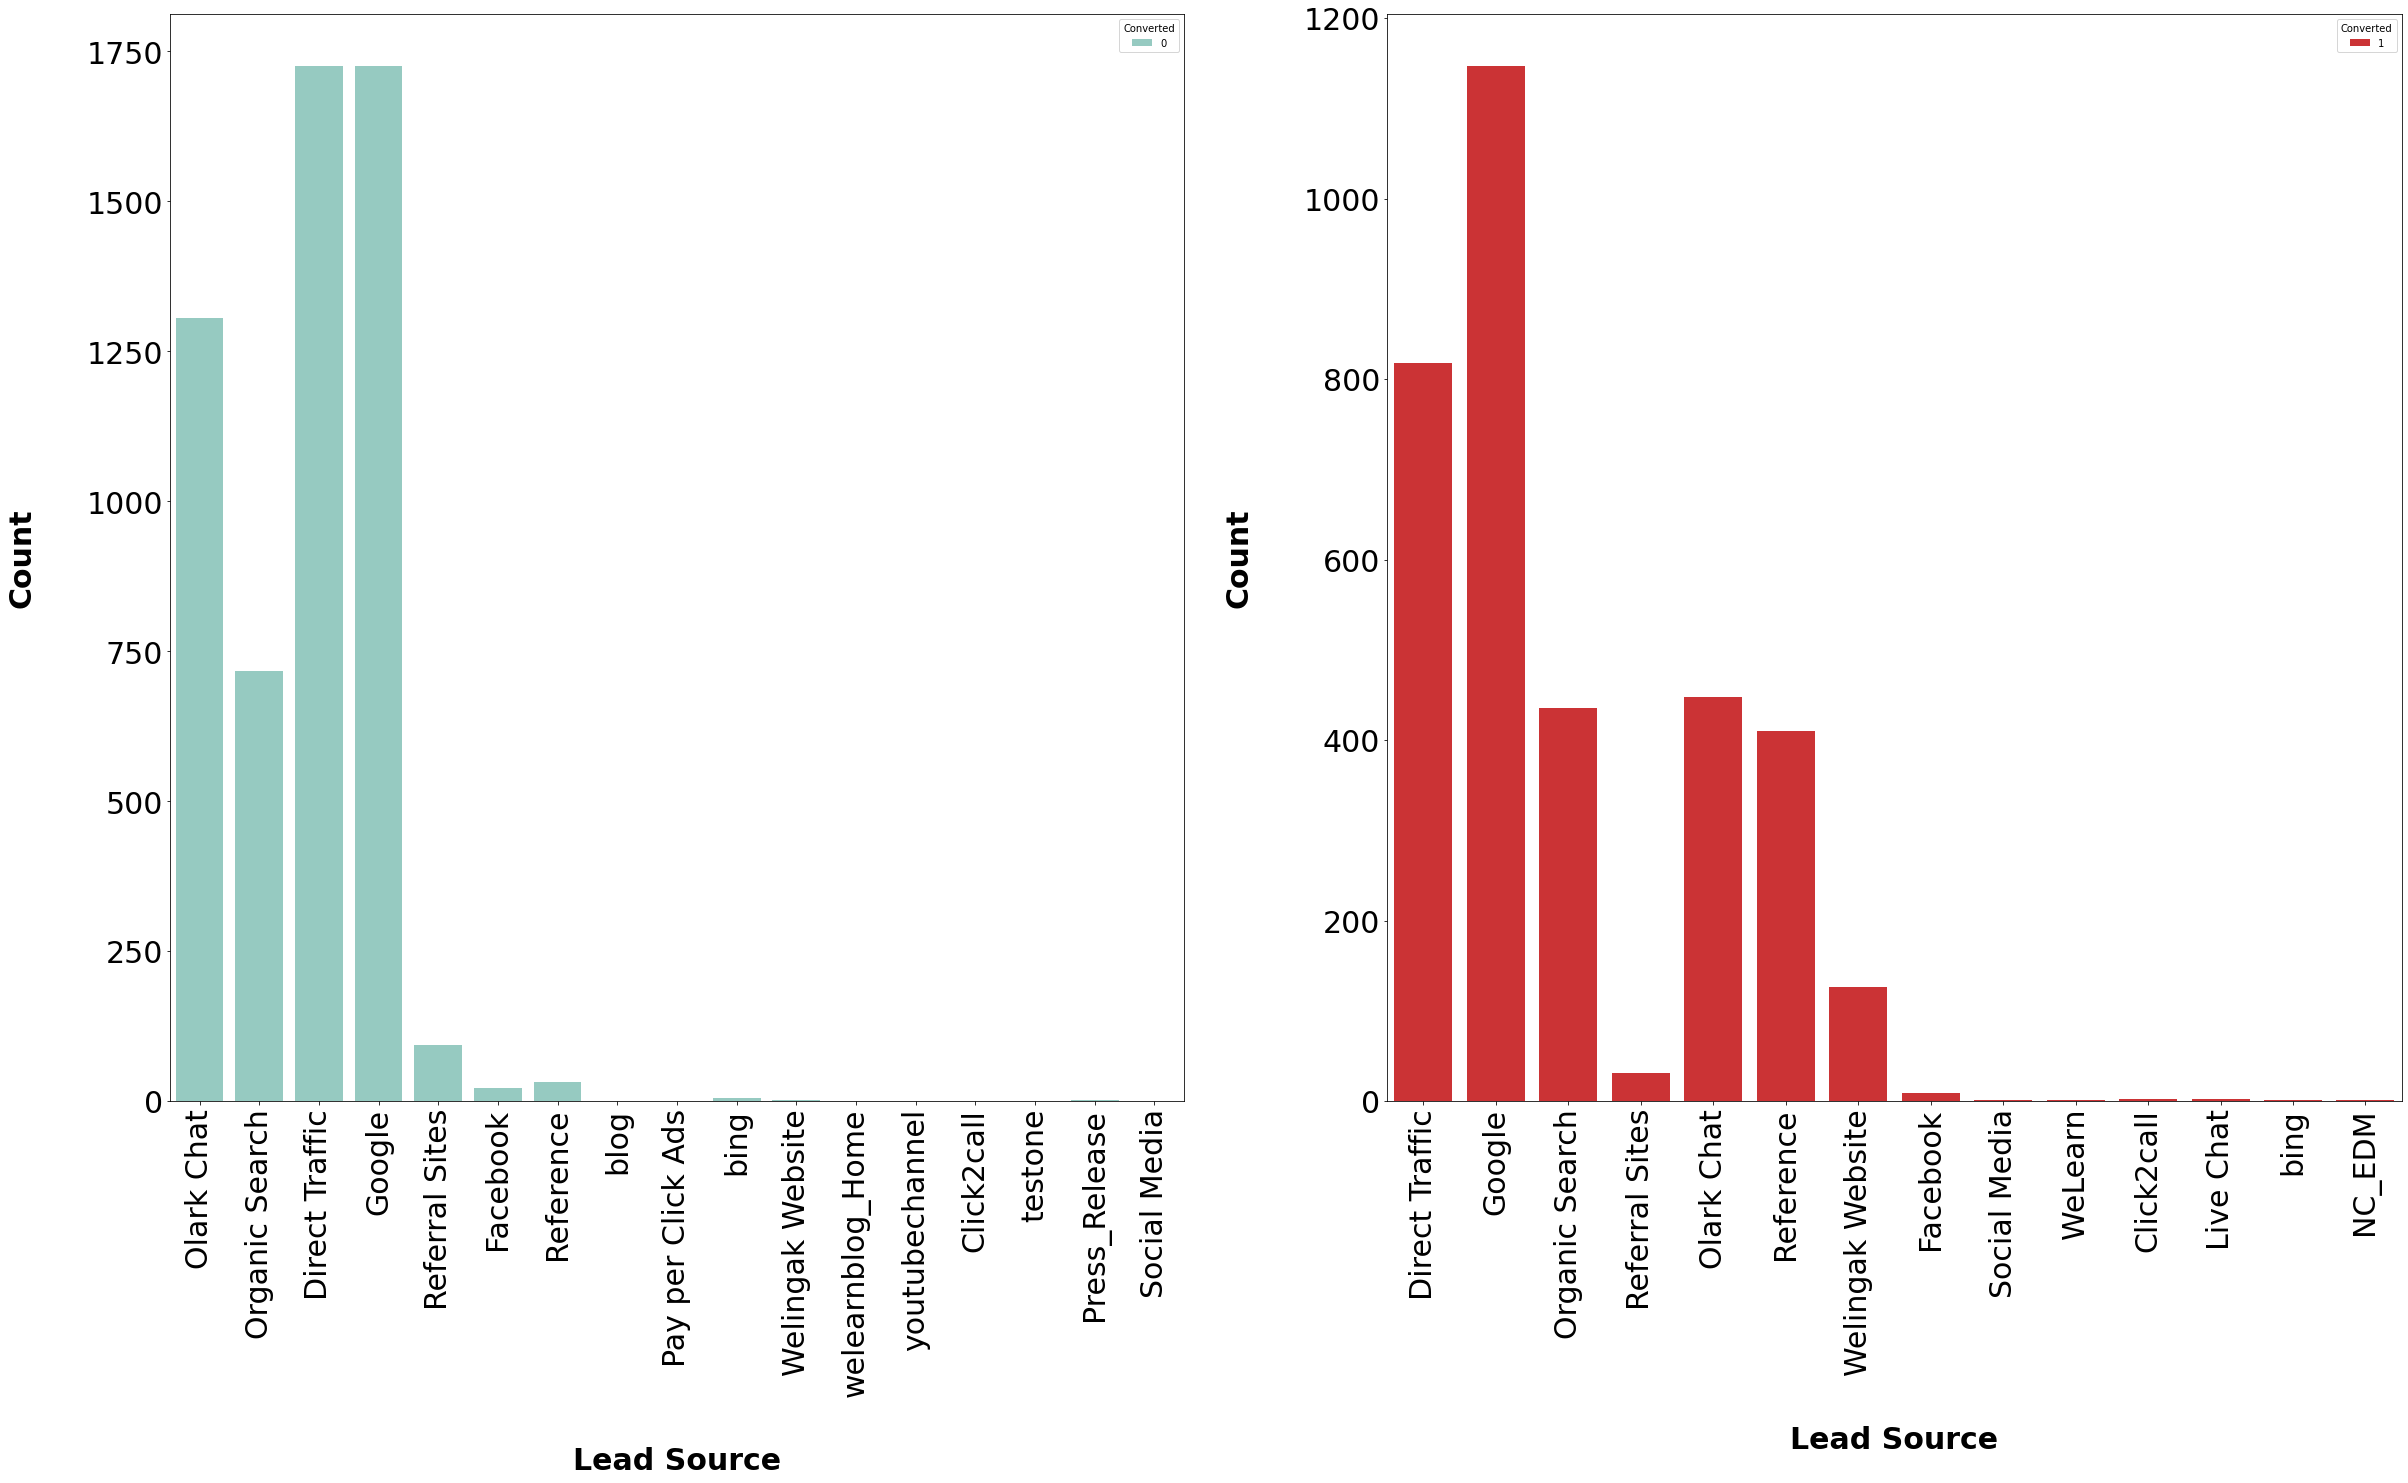

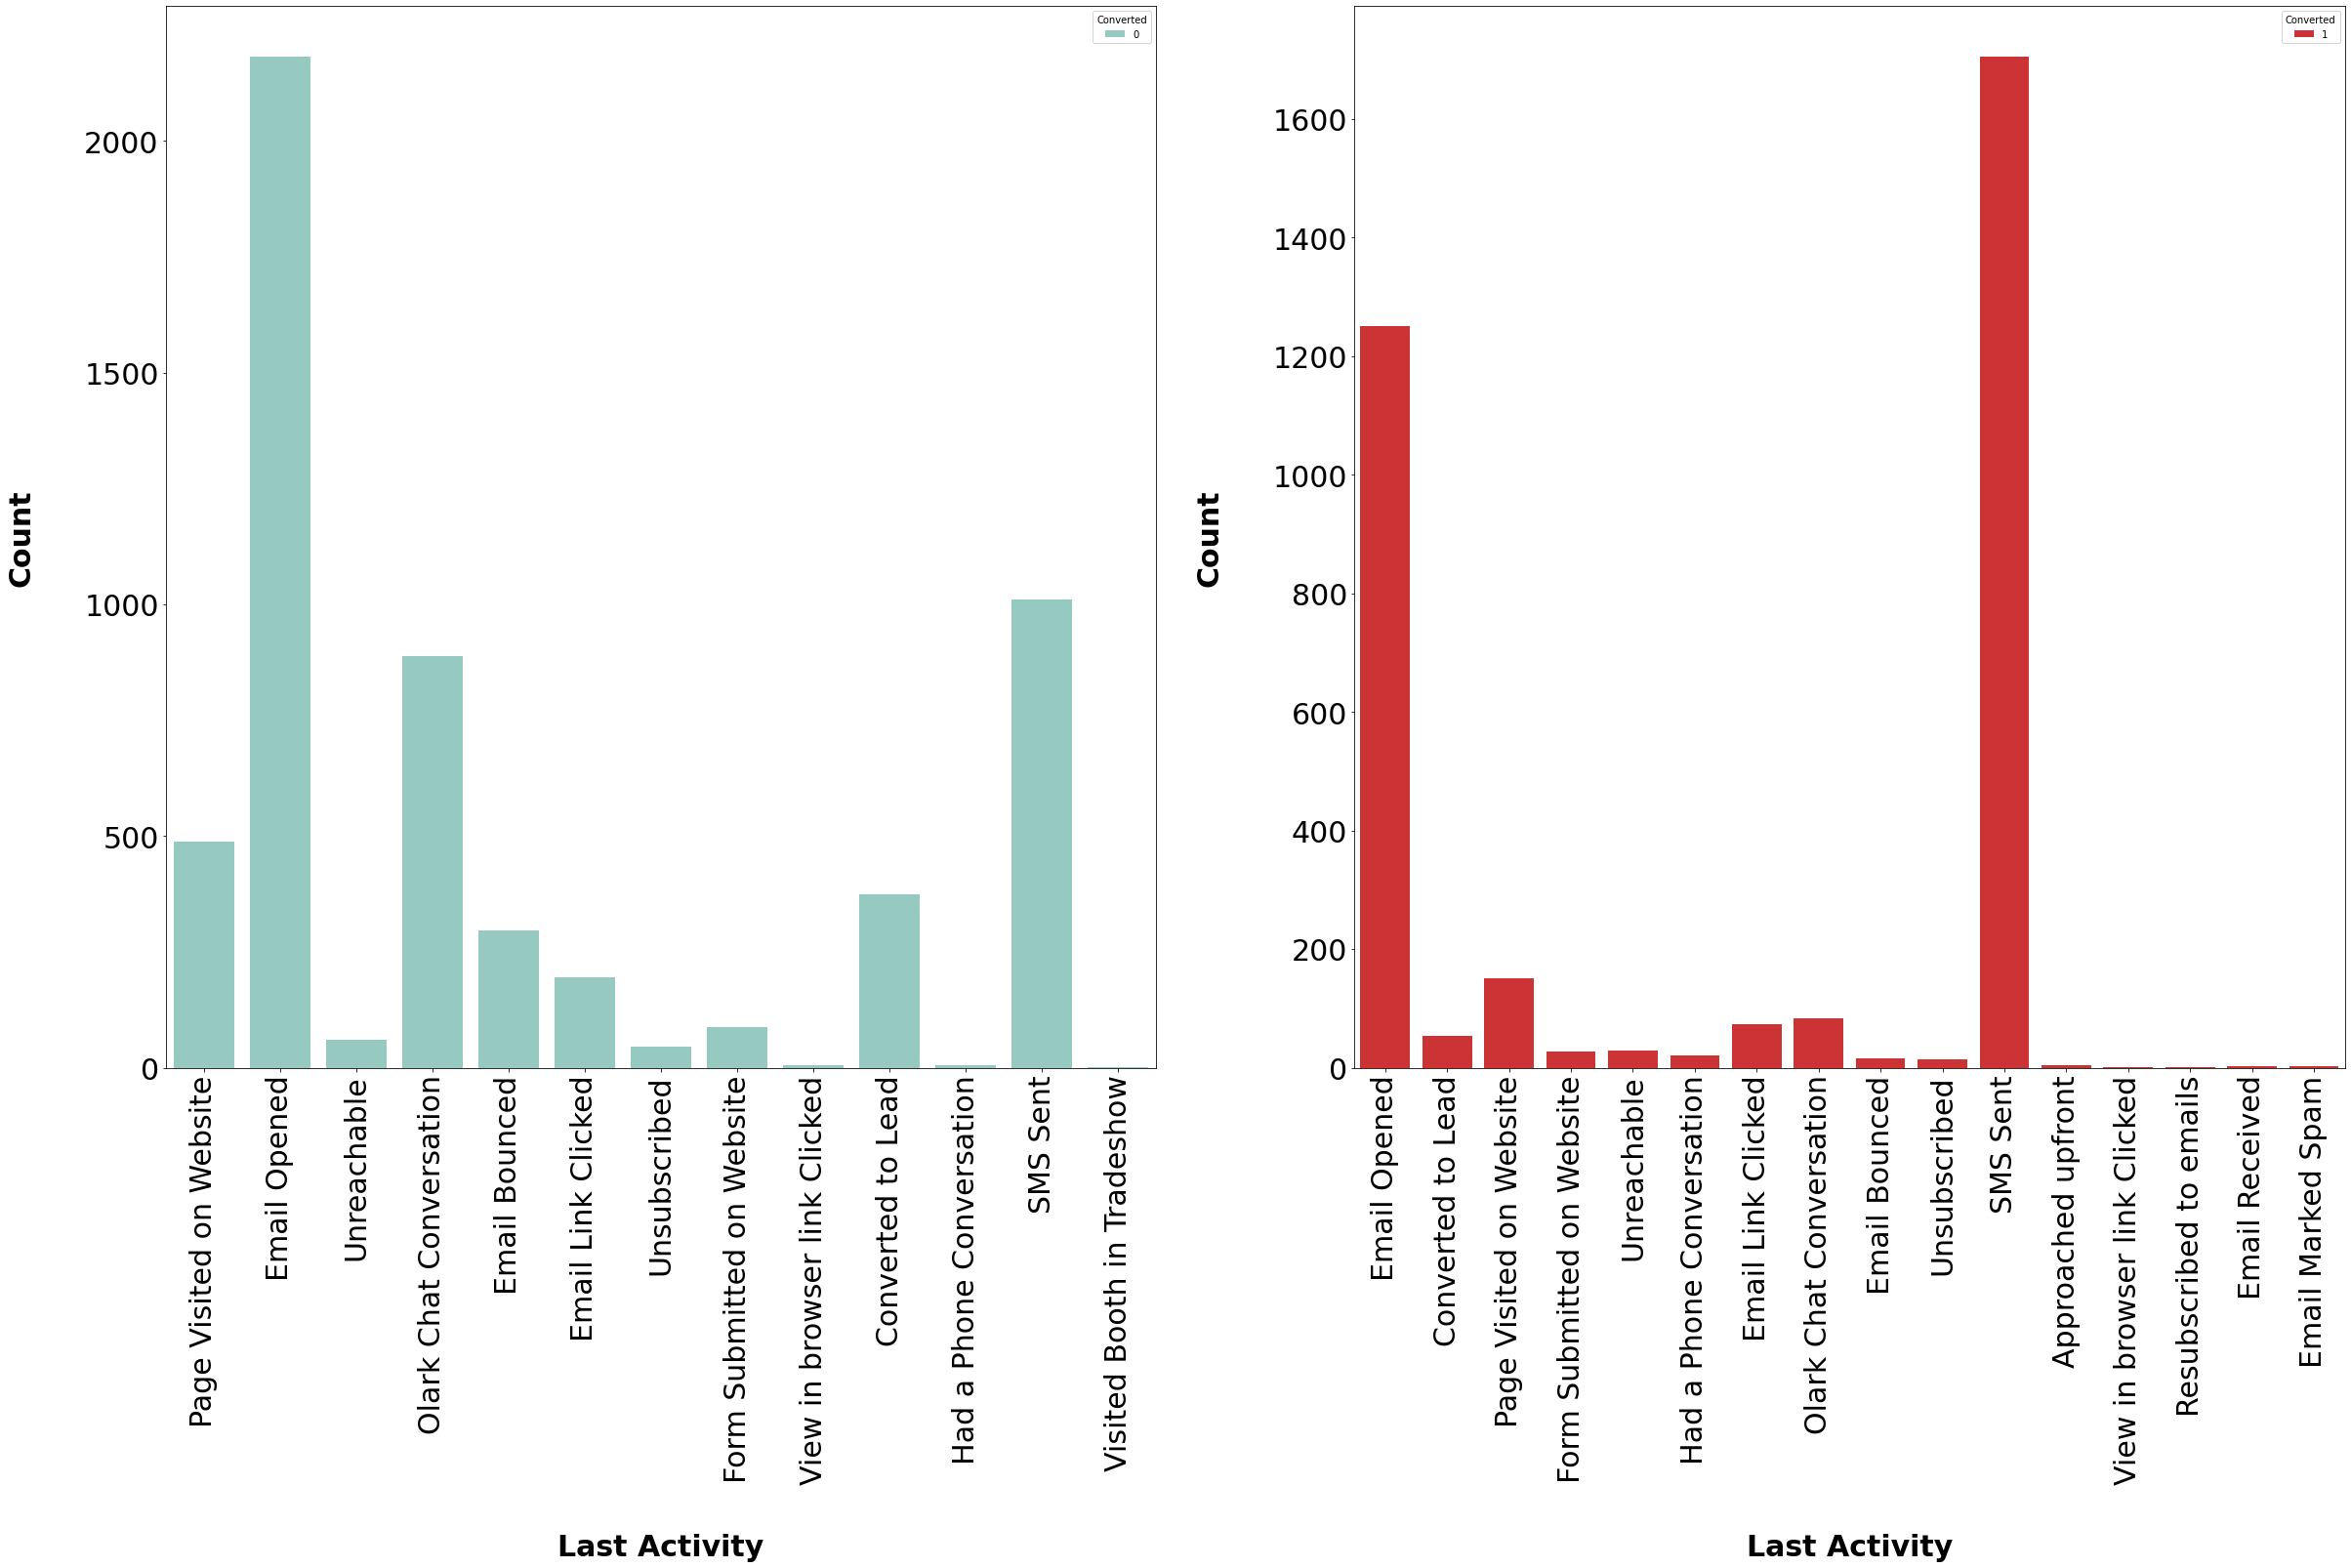

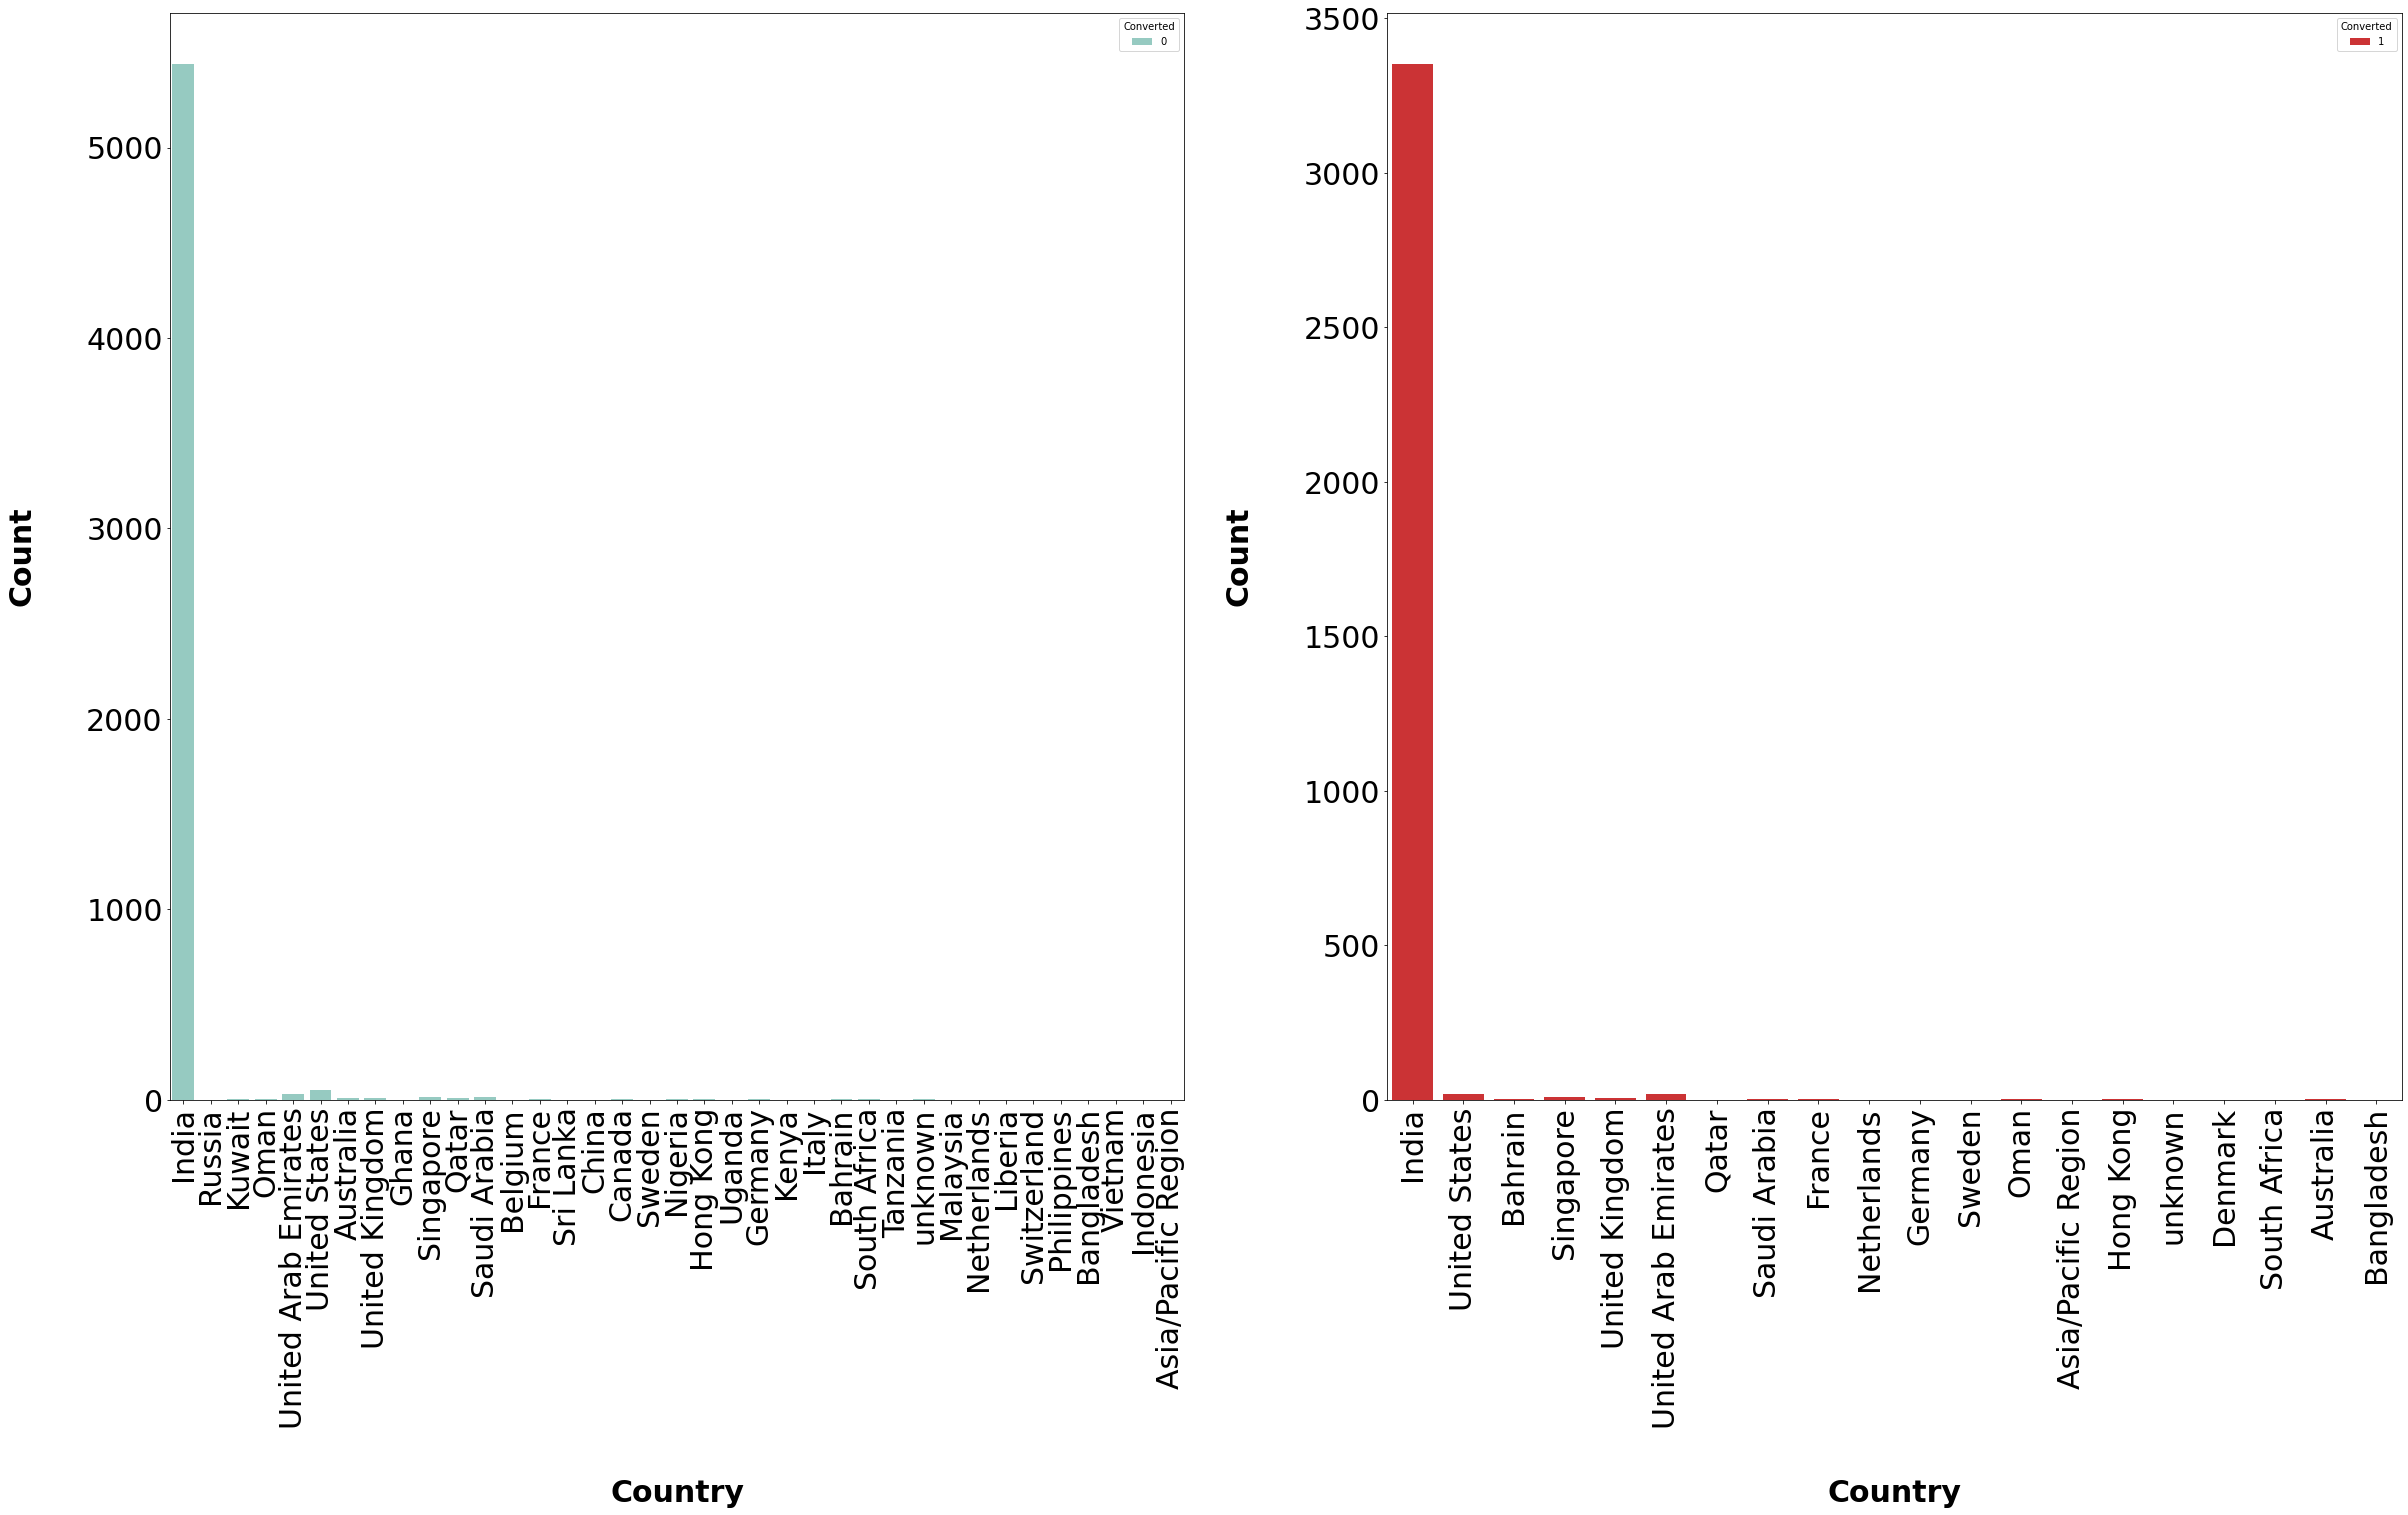

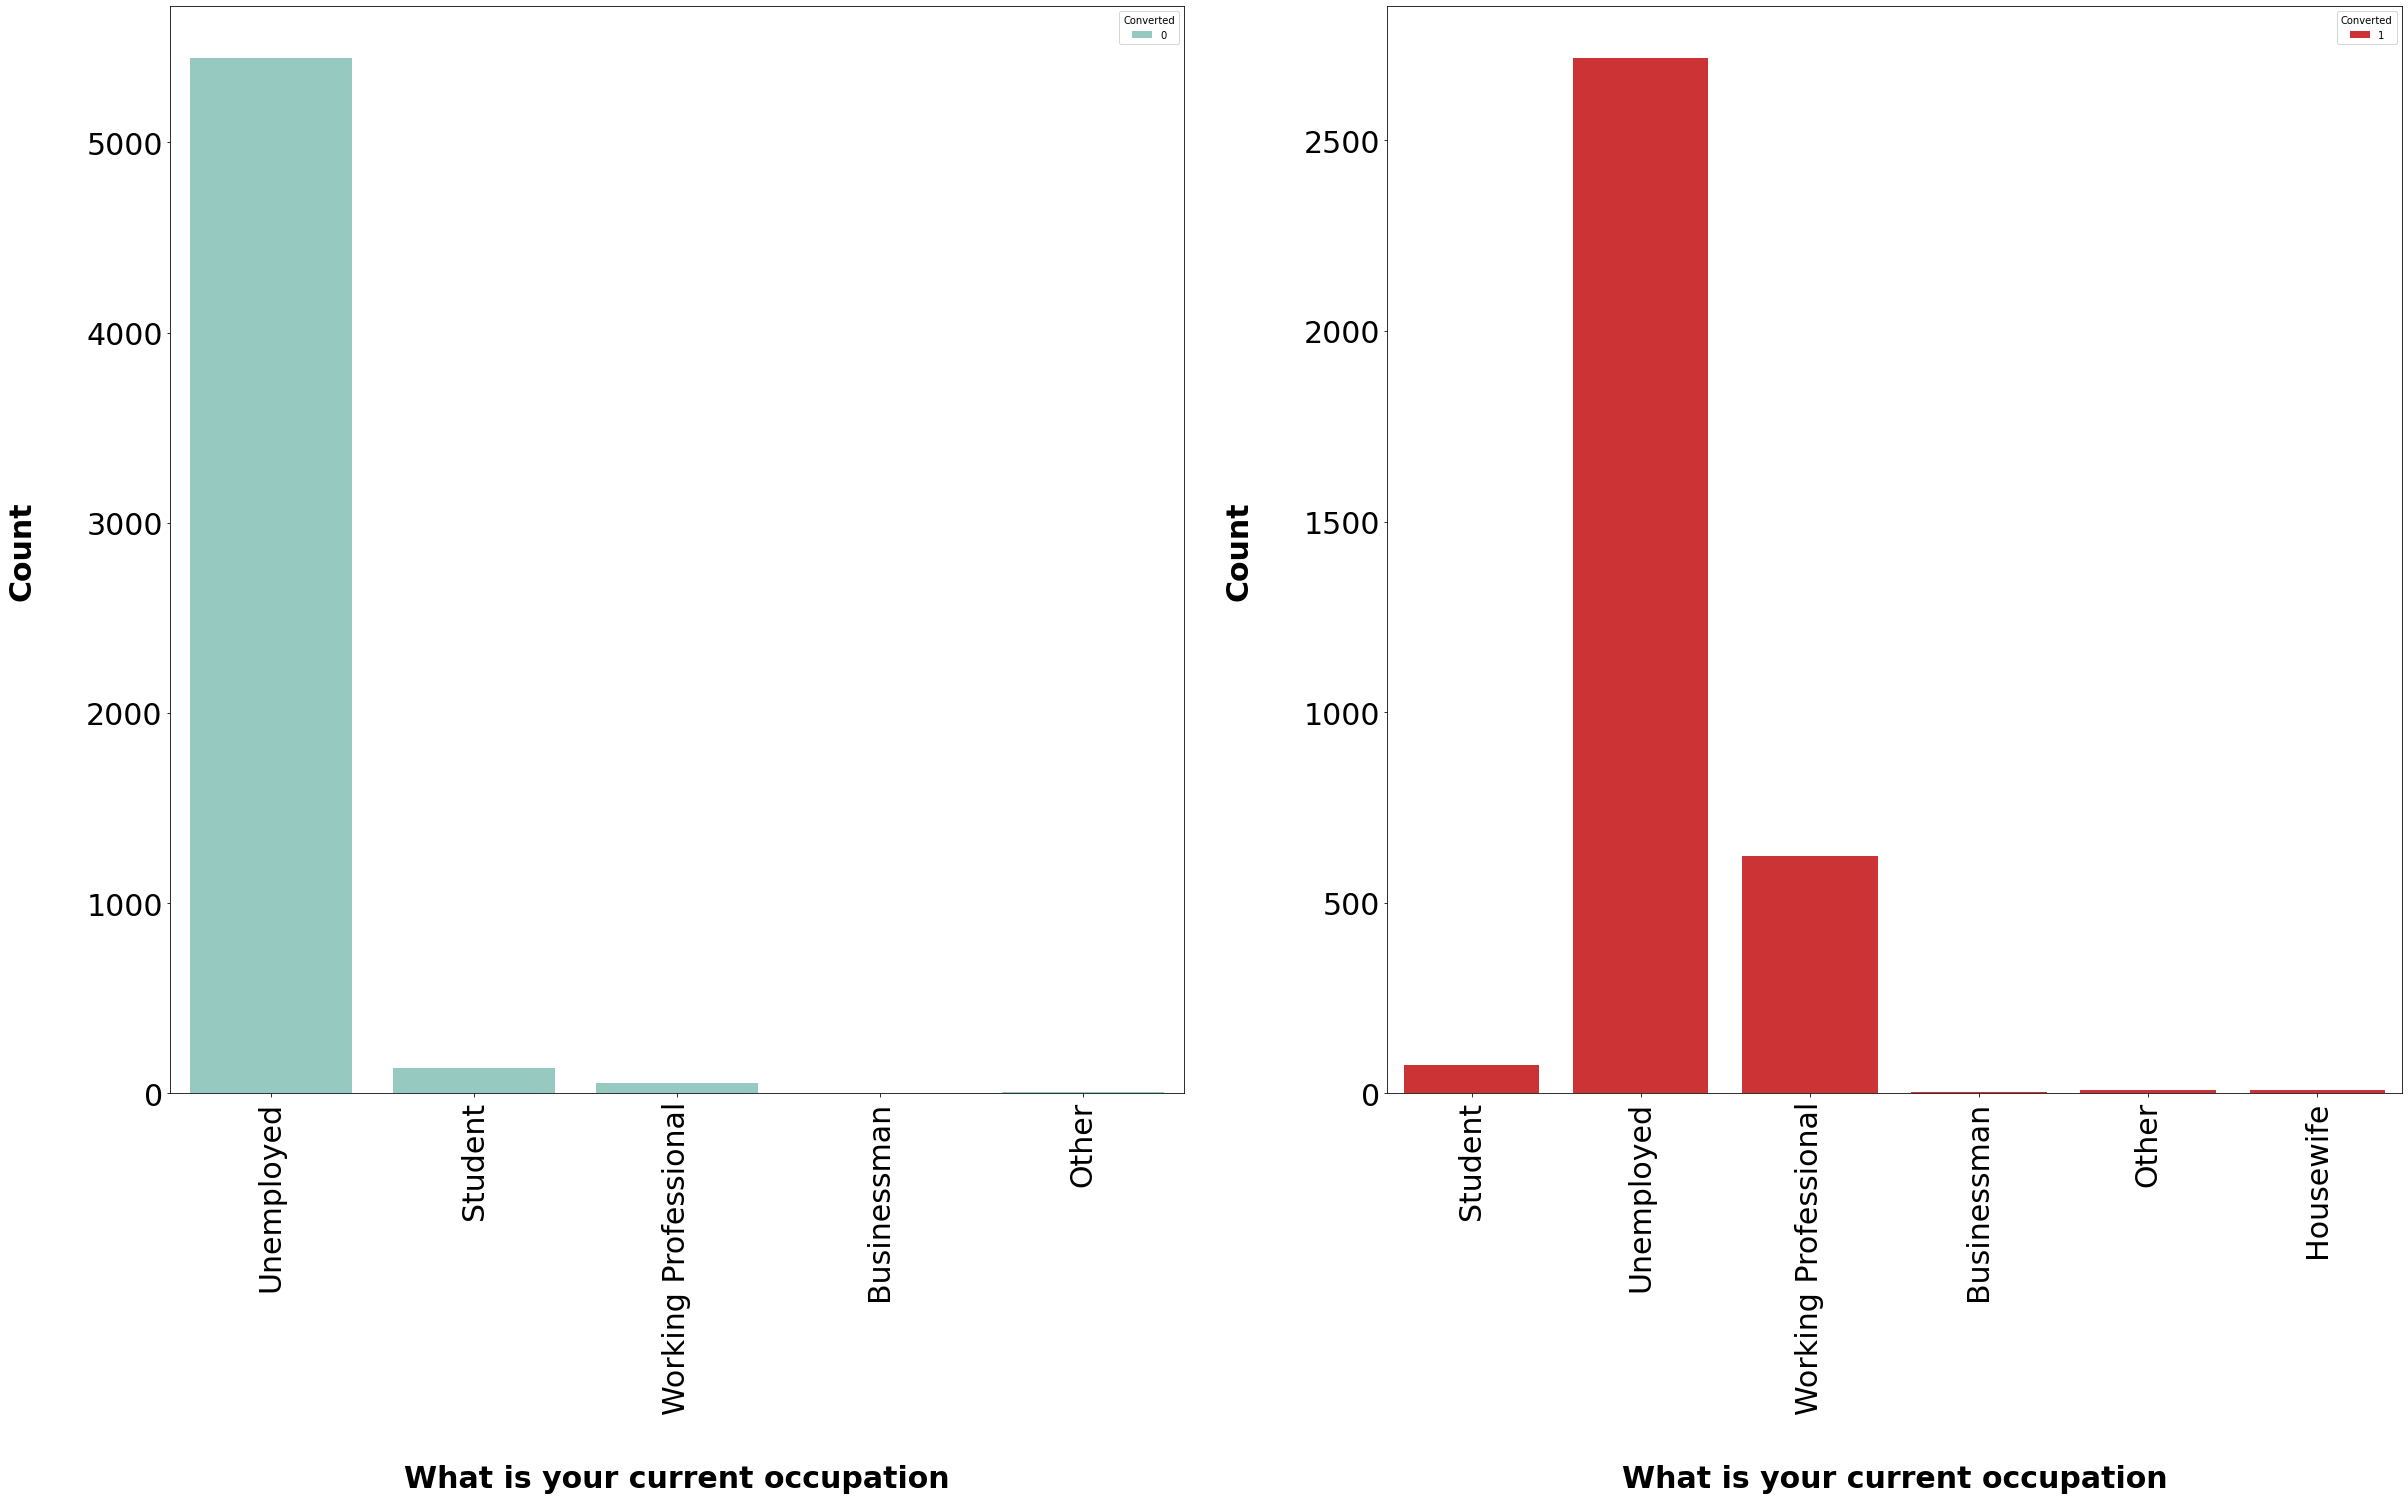

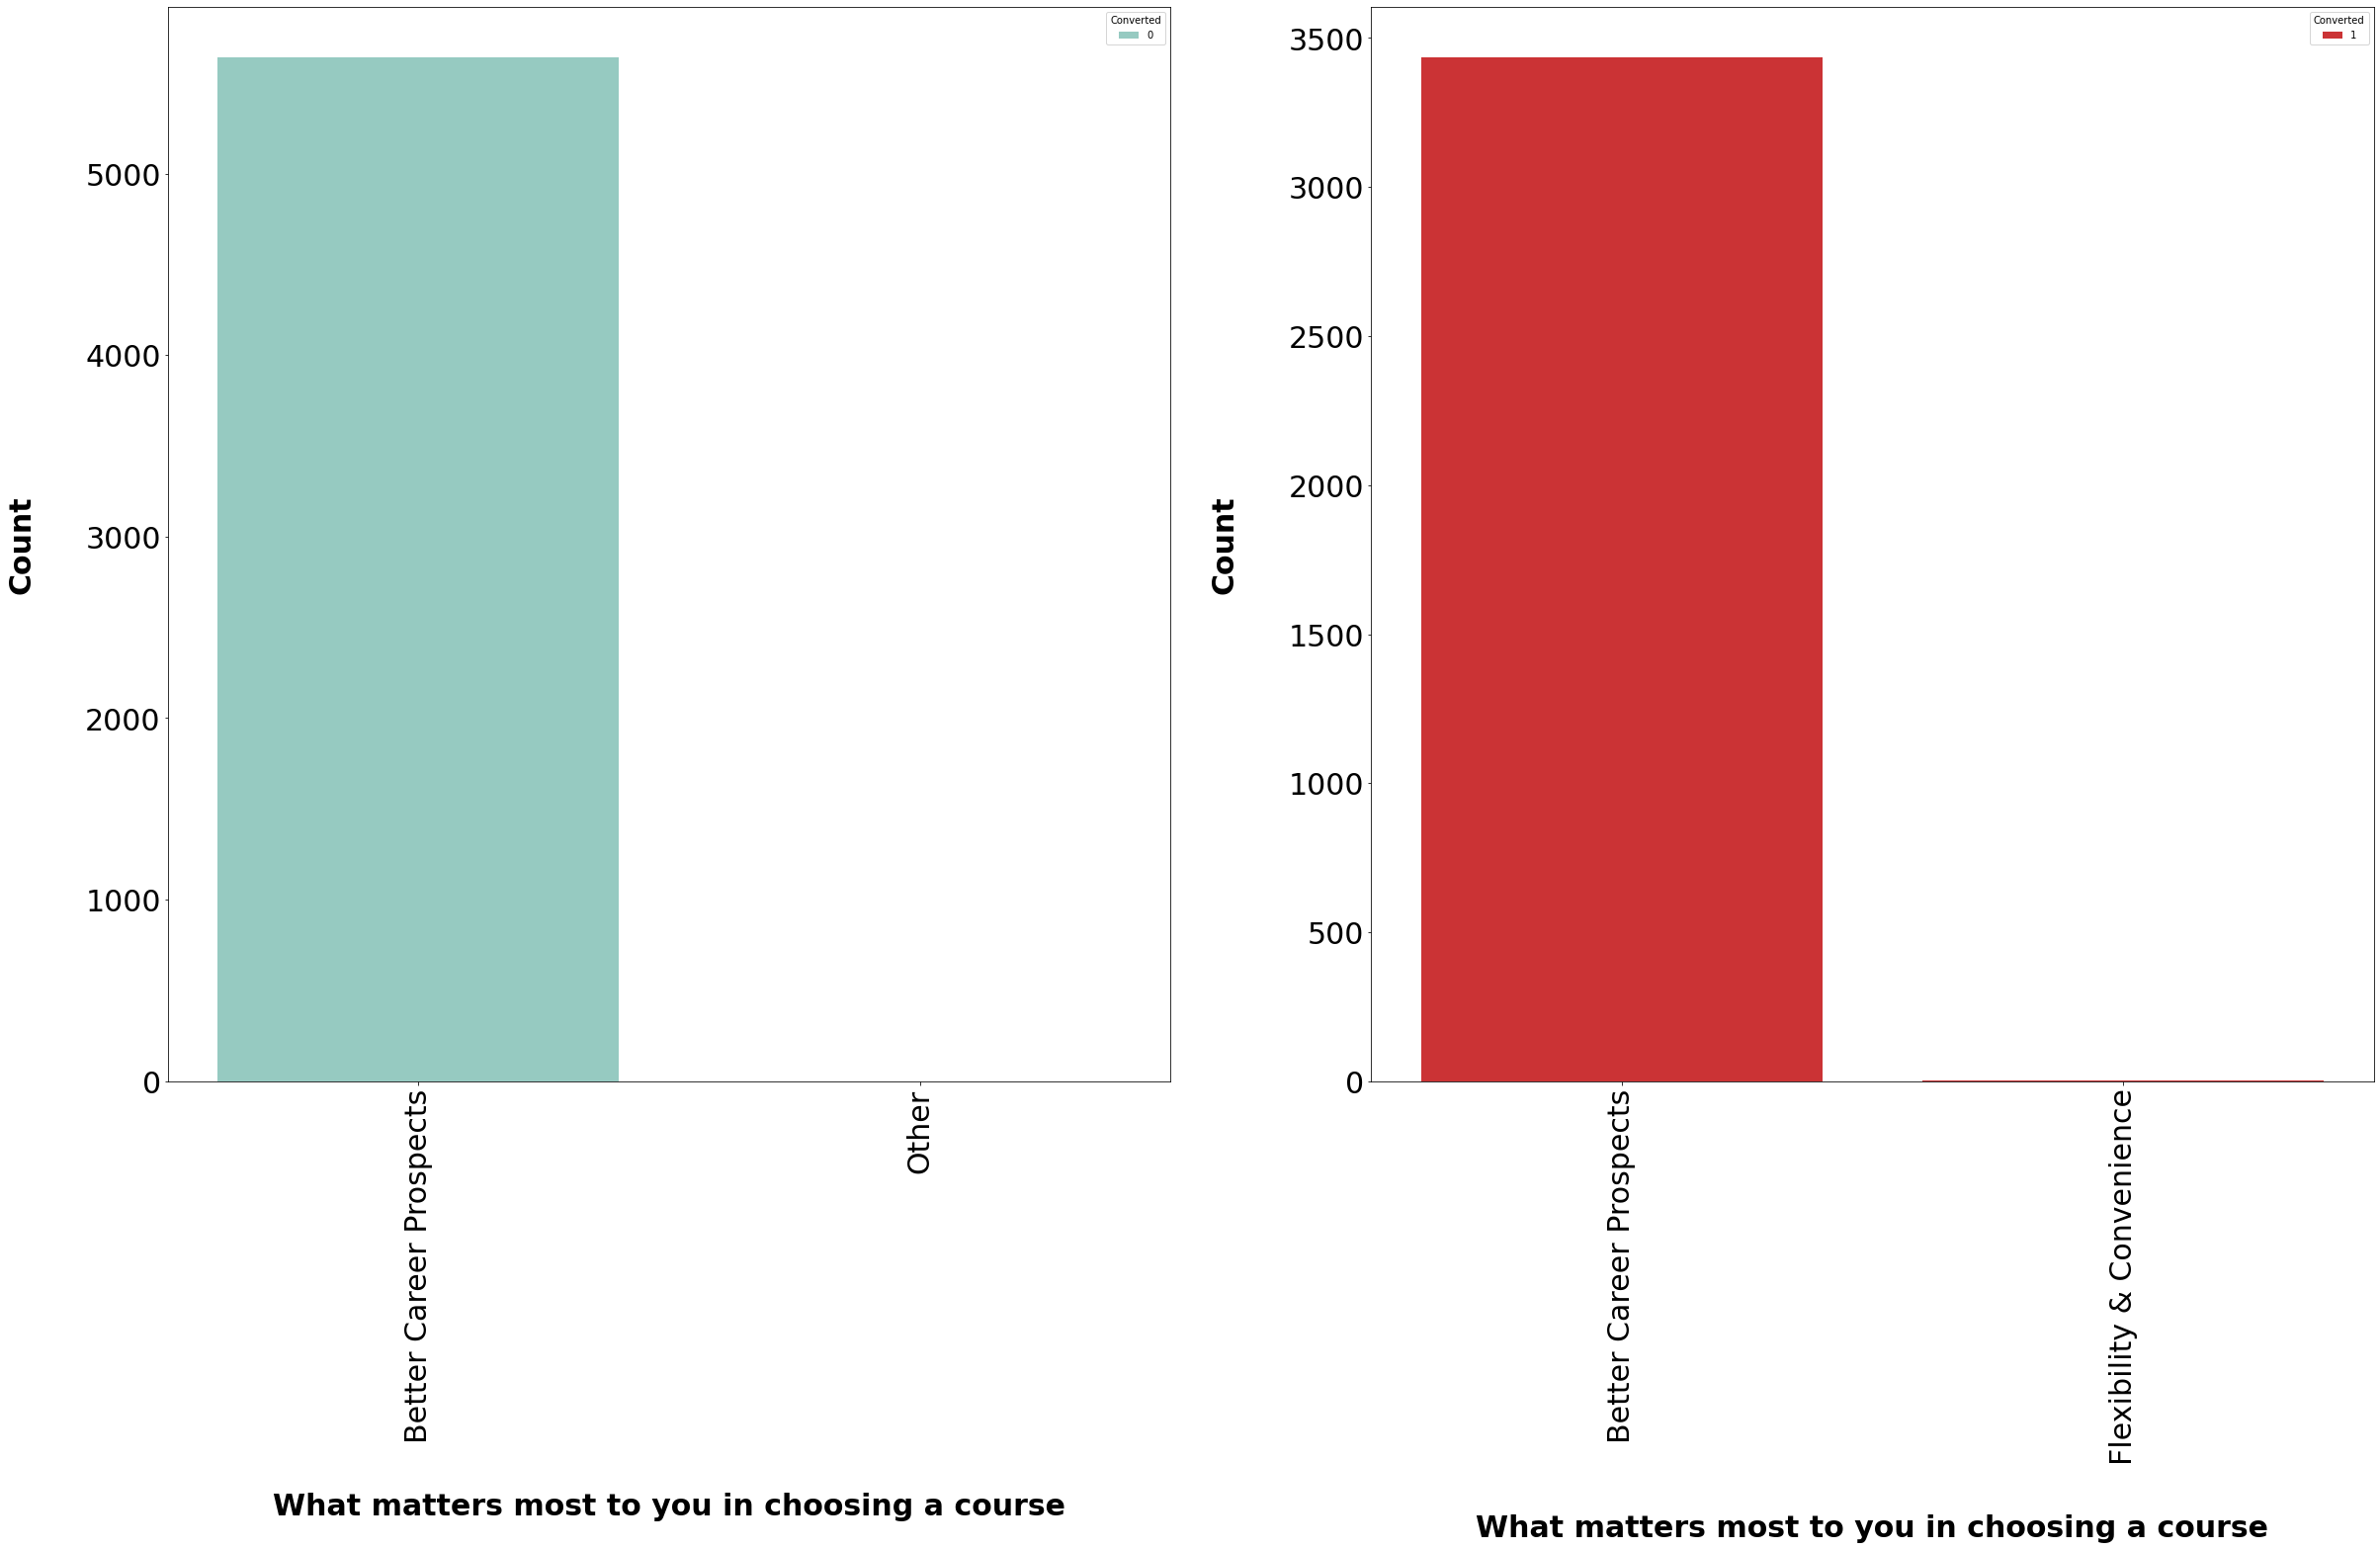

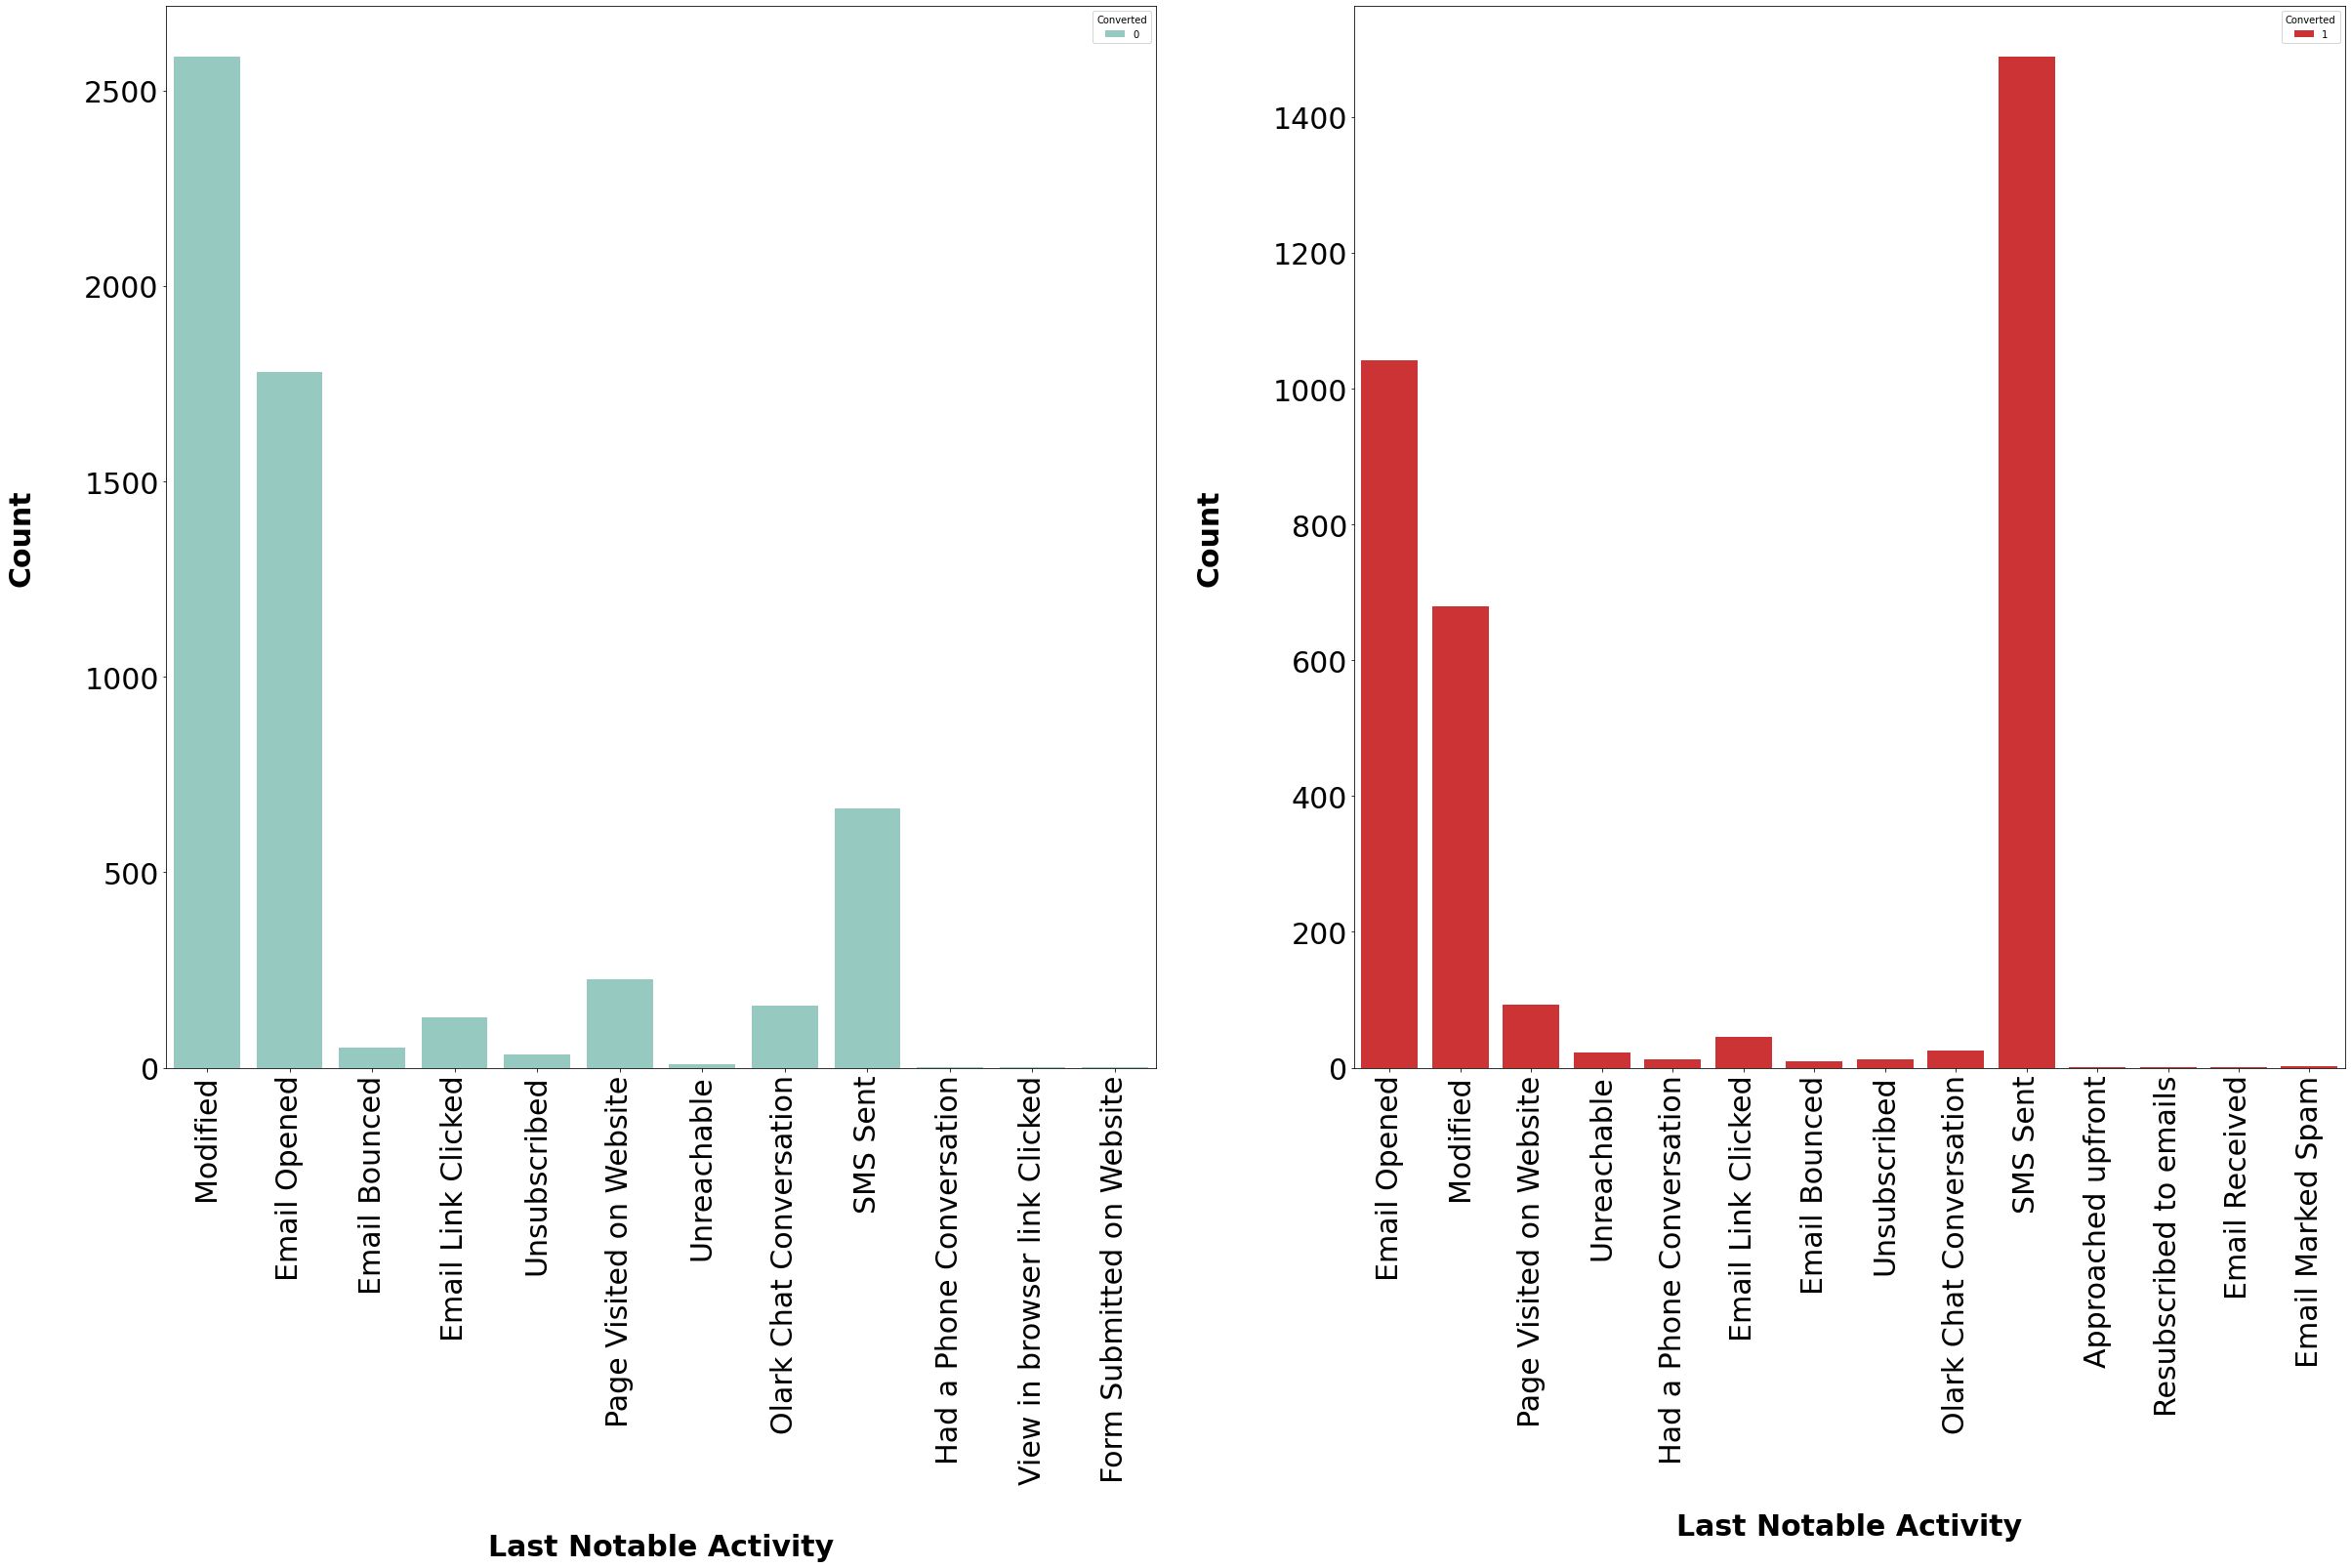

In [62]:
for cat in categorical_col:
    categorical_plot(cat)

### Observation 

*  Maximum conversion happened from Landing Page Submission Also there was only one request from quick add form which got converted.
*  From the above graph, it can be seen that major conversion in the lead source is from google
* last activity value of 'SMS Sent' had more conversion
* India has the highest number od people
* In current occupation majority are unemployed followed by working professionals
* Reason for choosing course is better career 
* Last notable activity is SMS sent
 

In [63]:
# bivariate analysis 

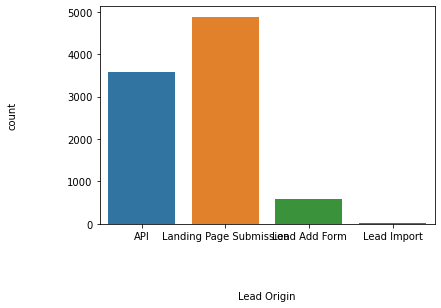

In [64]:
sns.countplot(x ='Lead Origin', data = lead)
 
# Show the plot
plt.show()

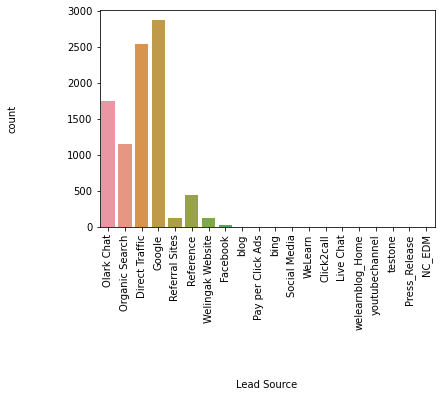

In [65]:
sns.countplot(x ='Lead Source', data =lead)
plt.xticks(rotation="vertical")

plt.show()

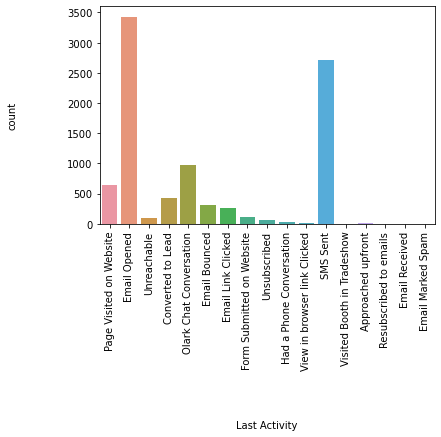

In [66]:
sns.countplot(x ='Last Activity', data = lead)
plt.xticks(rotation="vertical") 
plt.show()

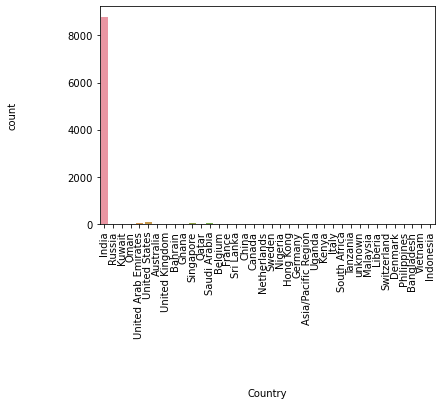

In [67]:
sns.countplot(x ='Country', data = lead)
plt.xticks(rotation="vertical")
plt.show()

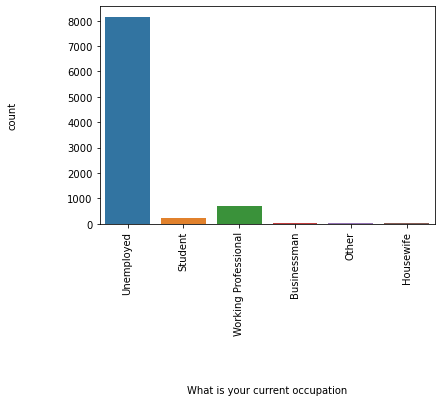

In [68]:
sns.countplot(x ='What is your current occupation', data = lead)
plt.xticks(rotation="vertical")
plt.show()

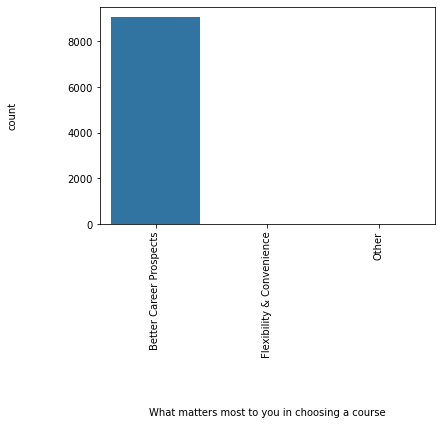

In [69]:
sns.countplot(x ='What matters most to you in choosing a course', data = lead)
plt.xticks(rotation="vertical")
plt.show()

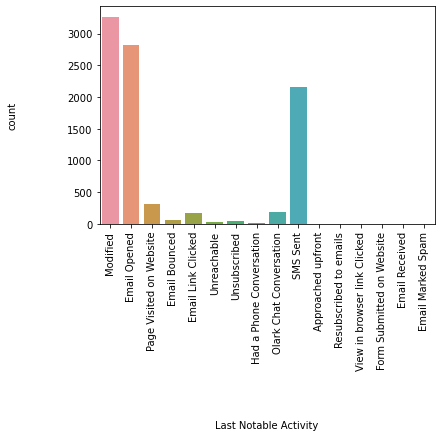

In [70]:
sns.countplot(x ='Last Notable Activity', data = lead)
plt.xticks(rotation="vertical")
plt.show()

### Observation

Lead Source -Google followed by direct traffic

Lead Origin- Landing Page submission has thmaximum count followed by API

Last Activity-Email Opened and SMS sent 

Country-Majority is from India 

What is your current occupation_- Most are unemployed 

What matters most to you in choosing a course- People who need better career prospect 

Last Notable Activity-Modified,Email Opened and SMS sent 


### 6.3 Analysis of Numeric Variable

In [71]:
numerical_col=list(lead.select_dtypes(exclude='object').columns)
numerical_col

['Lead Number',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

In [72]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   int64  
 5   Do Not Call                                    9074 non-null   int64  
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [73]:
#Checking Convertion for numeric variables

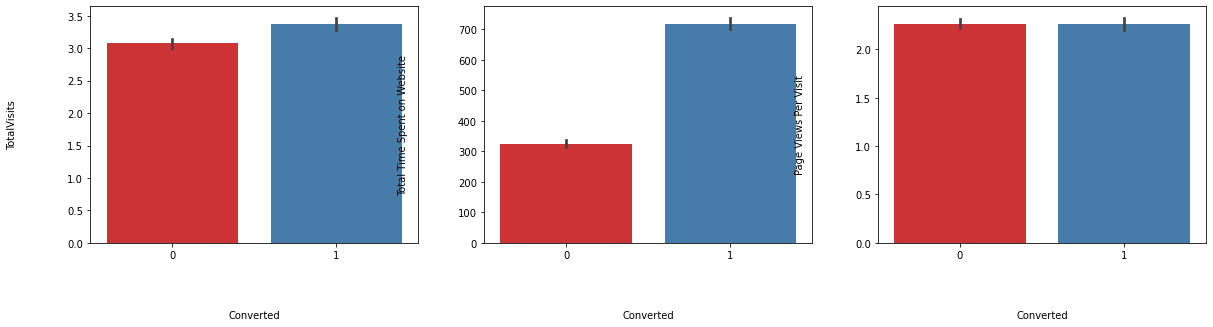

In [74]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set1', data = lead)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set1', data = lead)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set1', data = lead)
plt.show()


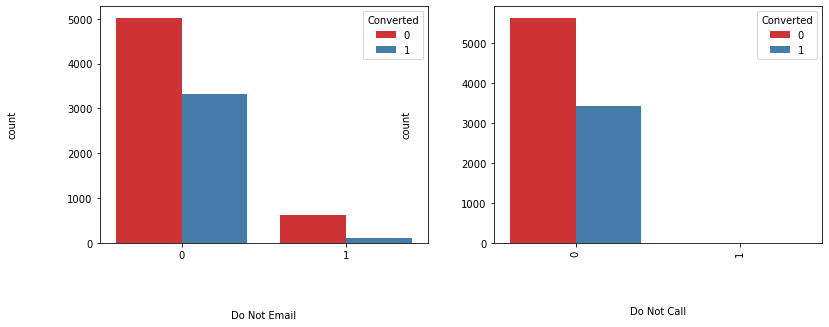

In [75]:
plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead,palette='Set1')
plt.subplot(4,3,2)
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

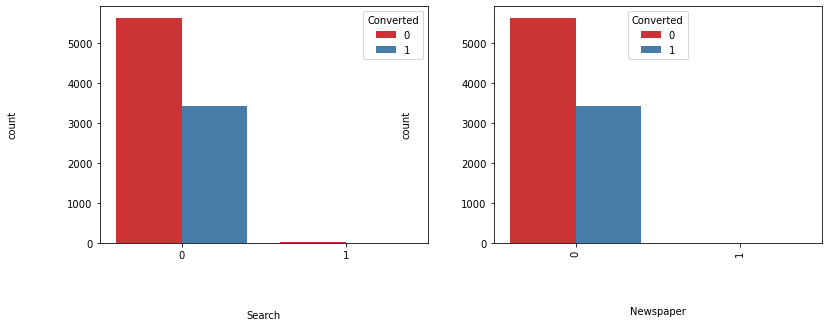

In [76]:
plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
sns.countplot(x = "Search", hue = "Converted", data = lead,palette='Set1')
plt.subplot(4,3,2)
sns.countplot(x = "Newspaper", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 90)
plt.show()




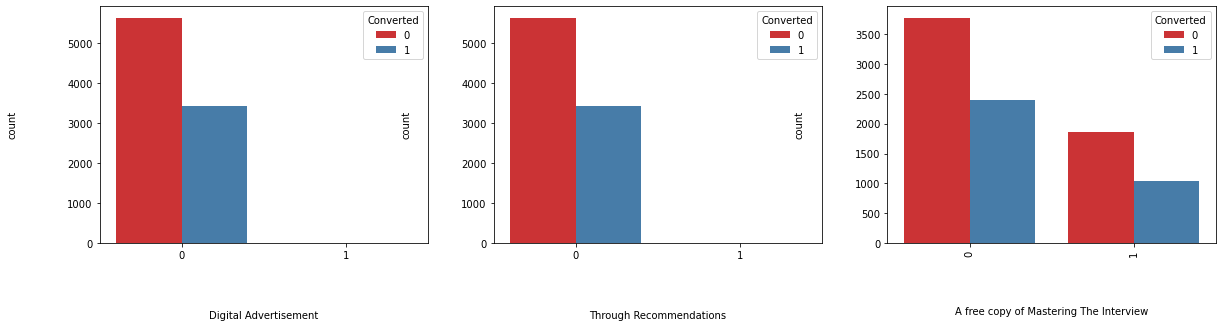

In [77]:
plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead,palette='Set1')
plt.subplot(4,3,2)
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead,palette='Set1')
plt.subplot(4,3,3)
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

### Observations
The conversion rated were high for Total Visits, Total Time Spent on Website and Page Views Per Visit

In [78]:
# droping following columns after analysis as they dont add any much information to model 
lead = lead.drop([ 'Lead Number', 'Search','Country',
       'Newspaper Article','X Education Forums','Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview'], axis=1)

In [79]:
lead.shape

(9074, 13)

## 7 Preparing data for modelling
1)Encoding

    Converting binary vars to 1/0 (already performed)

     Other categorical vars to dummy vars

2)Splitting into train and test

3)Rescaling of variables

In [80]:
lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,Modified


In [81]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   int64  
 4   Do Not Call                                    9074 non-null   int64  
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

In [82]:
# All are converted to 1/0

#### 7.1 Converting categorical vars to dummy vars

In [83]:
#'Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity'

In [84]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_lead = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
 'What matters most to you in choosing a course','Last Notable Activity']], drop_first=True)
dummy_lead.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,...,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [85]:
# Concatining dummy and the lead data

In [86]:
lead = pd.concat([lead,dummy_lead], axis=1)
lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,Modified,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,Email Opened,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,Email Opened,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,Modified,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,Modified,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [87]:
# Dropping columns of which dummies are created 

In [88]:
lead = lead.drop(['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
 'What matters most to you in choosing a course','Last Notable Activity'], axis = 1)

In [89]:
lead.shape

(9074, 67)

### 7.2 Splitting into Train and test

In [90]:
X = lead.drop(['Prospect ID','Converted'], axis=1)
X.head()

y = lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)  #70/30
 #70/30
print(X_train.shape)   
print(X_test.shape)
# Checking for the total remain same

(6351, 65)
(2723, 65)


### 7.3 Rescaling 

In [92]:
scaler=MinMaxScaler()  #instantiate an object

 
v=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']  # list of numeric vars

X_train[v]    # fit on data
X_train[v]  =scaler.fit_transform(X_train[v])  

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,0.2,0.254978,0.333333,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,0.2,0.122030,0.333333,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,0.2,0.886320,0.333333,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.5,1.000000,0.416667,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [93]:
# Checking the conversion rate 

In [94]:
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

37.85541106458012

###  Observation 

Lead conversion rate is 38%

# 8 Model Development 

Automatic Selection using RFE is performed

Manual Selection for fine tune by considering P-Value and VIF is done

###  8.1  Checking for correlations 

In [95]:
# Correlation between different numerical variables
correlation = lead.corr()

#  find out top correlations and sorting 
correlation_unstacked = correlation.unstack().sort_values(kind="quicksort")
correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Last Activity_Resubscribed to emails    Last Notable Activity_Resubscribed to emails      1.000000
Last Activity_Email Marked Spam         Last Notable Activity_Email Marked Spam           1.000000
Lead Origin_Lead Import                 Lead Source_Facebook                              0.983684
Last Activity_Unsubscribed              Last Notable Activity_Unsubscribed                0.872656
Lead Origin_Lead Add Form               Lead Source_Reference                             0.866191
Last Activity_Email Opened              Last Notable Activity_Email Opened                0.861636
Last Activity_SMS Sent                  Last Notable Activity_SMS Sent                    0.853102
Last Activity_Email Link Clicked        Last Notable Activity_Email Link Clicked          0.800686
TotalVisits                             Page Views Per Visit                              0.766567
Last Activity_Had a Phone Conversation  Last Notable Activity_Had a Phone Conversation    0.747877
dtype: flo

In [96]:
#Removing the highly correlated features more than 85 %

X_train=X_train.drop(['Last Notable Activity_Email Marked Spam','Last Notable Activity_Resubscribed to emails','Lead Source_Facebook','Last Notable Activity_Unsubscribed','Lead Source_Reference','Last Notable Activity_Email Opened','Last Notable Activity_SMS Sent'],1)

X_test=X_test.drop(['Last Notable Activity_Email Marked Spam','Last Notable Activity_Resubscribed to emails','Lead Source_Facebook','Last Notable Activity_Unsubscribed','Lead Source_Reference','Last Notable Activity_Email Opened','Last Notable Activity_SMS Sent'],1)




In [97]:
correlation = X_train.corr()

In [98]:
correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Last Activity_Had a Phone Conversation  Last Notable Activity_Had a Phone Conversation    0.839837
Last Activity_Email Link Clicked        Last Notable Activity_Email Link Clicked          0.804444
TotalVisits                             Page Views Per Visit                              0.766735
Last Activity_Email Received            Last Notable Activity_Email Received              0.707051
Last Activity_Page Visited on Website   Last Notable Activity_Page Visited on Website     0.685169
Do Not Email                            Last Activity_Email Bounced                       0.624939
Last Activity_Unreachable               Last Notable Activity_Unreachable                 0.607326
Page Views Per Visit                    Lead Origin_Landing Page Submission               0.550102
Lead Origin_Landing Page Submission     Lead Source_Direct Traffic                        0.516152
Lead Origin_Lead Add Form               Lead Source_Welingak Website                      0.468225
dtype: flo

### 8.2 RFE 

In [99]:
logre=LogisticRegression() # Making an Logistic Regression


rfe=RFE(logre,n_features_to_select=20) # Making rfe on fitted lm
rfe=rfe.fit(X_train,y_train)   # Converting to fitted RFE

In [100]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_)) # Visualising the result 

[('Do Not Email', True, 1),
 ('Do Not Call', False, 7),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', False, 27),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 11),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 32),
 ('Lead Source_NC_EDM', False, 25),
 ('Lead Source_Olark Chat', False, 12),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 29),
 ('Lead Source_Press_Release', False, 24),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 10),
 ('Lead Source_WeLearn', False, 39),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 37),
 ('Lead Source_blog', False, 15),
 ('Lead Source_testone', False, 28),
 ('Lead Source_welearnblog_Home', False, 23),
 ('Lead Source_youtubechannel', False, 22),
 ('Last Activity_Co

In [101]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

### 8.3 Model Building

In [102]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2611.0
Date:                Mon, 17 Apr 2023   Deviance:                       5222.1
Time:                        08:56:19   Pearson chi2:                 6.35e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4000
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3005      0.623      0.483      0.629      -0.920       1.521
Do Not Email                                            -1.6176      0.188     -8.608      0.000      -1.986      -1.249
TotalVisits                                              0.5871      0.161      3.651      0.000       0.272       0.902
Total Time Spent on Website                              3.3908      0.120     28.266      0.000       3.156       3.626
Lead Origin_Lead Add Form                                2.6926      0.229     11.767      0.000       2.244       3.141
Lead Source_Direct Traffic                              -1.7164      0.131    -13.110      0.000      -1.973      -1.460
Lead Source_Google                                      -1.3430      0.127    -10.548      0.000      -1.593      -1.093
Lead Source_Organic Search                              -1.6572      0.159    -10.391      0.000      -1.970      -1.345
Lead Source_Referral Sites                              -1.7849      0.360     -4.955      0.000      -2.491      -1.079
Lead Source_Welingak Website                             1.9854      0.752      2.639      0.008       0.511       3.460
Last Activity_Had a Phone Conversation                   2.3538      1.164      2.022      0.043       0.072       4.635
Last Activity_Olark Chat Conversation                   -1.0013      0.167     -5.980      0.000      -1.329      -0.673
Last Activity_SMS Sent                                   1.3237      0.076     17.486      0.000       1.175       1.472
Last Activity_Unsubscribed                               1.3382      0.476      2.812      0.005       0.405       2.271
What is your current occupation_Housewife               21.6978   1.54e+04      0.001      0.999   -3.02e+04    3.02e+04
What is your current occupation_Student                 -0.8810      0.656     -1.343      0.179      -2.166       0.404
What is your current occupation_Unemployed              -1.3314      0.617     -2.158      0.031      -2.541      -0.122
What is your current occupation_Working Professional     1.4661      0.643      2.280      0.023       0.206       2.726
Last Notable Activity_Had a Phone Conversation           0.9762      1.600      0.610      0.542      -2.159       4.112
Last Notable Activity_Modified                          -0.8302      0.081    -10.205      0.000      -0.990      -0.671
Last Notable Activity_Unreachable                        1.6203      0.481      3.367      0.001       0.677       2.563
========================================================================================================================
"""

#### Observation
Pvalue of 'What is your current occupation_Housewife' is very high

In [103]:
# dropping the column
col1 = cols.drop('What is your current occupation_Housewife')

In [104]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2612.9
Date:                Mon, 17 Apr 2023   Deviance:                       5225.9
Time:                        08:56:19   Pearson chi2:                 6.35e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3996
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7539      0.572      1.318      0.187      -0.367       1.875
Do Not Email                                            -1.6212      0.188     -8.620      0.000      -1.990      -1.253
TotalVisits                                              0.5761      0.161      3.586      0.000       0.261       0.891
Total Time Spent on Website                              3.3878      0.120     28.259      0.000       3.153       3.623
Lead Origin_Lead Add Form                                2.6968      0.229     11.790      0.000       2.248       3.145
Lead Source_Direct Traffic                              -1.7111      0.131    -13.080      0.000      -1.968      -1.455
Lead Source_Google                                      -1.3375      0.127    -10.512      0.000      -1.587      -1.088
Lead Source_Organic Search                              -1.6462      0.159    -10.341      0.000      -1.958      -1.334
Lead Source_Referral Sites                              -1.7773      0.360     -4.935      0.000      -2.483      -1.071
Lead Source_Welingak Website                             1.9822      0.752      2.635      0.008       0.508       3.457
Last Activity_Had a Phone Conversation                   2.3532      1.164      2.022      0.043       0.072       4.634
Last Activity_Olark Chat Conversation                   -1.0021      0.168     -5.983      0.000      -1.330      -0.674
Last Activity_SMS Sent                                   1.3226      0.076     17.473      0.000       1.174       1.471
Last Activity_Unsubscribed                               1.3405      0.476      2.817      0.005       0.408       2.273
What is your current occupation_Student                 -1.3333      0.608     -2.193      0.028      -2.525      -0.142
What is your current occupation_Unemployed              -1.7832      0.566     -3.151      0.002      -2.892      -0.674
What is your current occupation_Working Professional     1.0139      0.594      1.707      0.088      -0.151       2.178
Last Notable Activity_Had a Phone Conversation           0.9761      1.600      0.610      0.542      -2.159       4.111
Last Notable Activity_Modified                          -0.8342      0.081    -10.257      0.000      -0.994      -0.675
Last Notable Activity_Unreachable                        1.6168      0.482      3.358      0.001       0.673       2.561
========================================================================================================================
"""

#### Observation
Pvalue of 'Last Notable Activity_Had a Phone Conversation' is very high

In [105]:
# dropping the column
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

In [106]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2613.1
Date:                Mon, 17 Apr 2023   Deviance:                       5226.3
Time:                        08:56:19   Pearson chi2:                 6.36e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3996
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7554      0.572      1.321      0.187      -0.365       1.876
Do Not Email                                            -1.6232      0.188     -8.632      0.000      -1.992      -1.255
TotalVisits                                              0.5776      0.161      3.596      0.000       0.263       0.892
Total Time Spent on Website                              3.3869      0.120     28.253      0.000       3.152       3.622
Lead Origin_Lead Add Form                                2.6973      0.229     11.791      0.000       2.249       3.146
Lead Source_Direct Traffic                              -1.7107      0.131    -13.076      0.000      -1.967      -1.454
Lead Source_Google                                      -1.3367      0.127    -10.507      0.000      -1.586      -1.087
Lead Source_Organic Search                              -1.6490      0.159    -10.360      0.000      -1.961      -1.337
Lead Source_Referral Sites                              -1.7818      0.361     -4.937      0.000      -2.489      -1.074
Lead Source_Welingak Website                             1.9824      0.752      2.635      0.008       0.508       3.457
Last Activity_Had a Phone Conversation                   2.9135      0.758      3.845      0.000       1.428       4.399
Last Activity_Olark Chat Conversation                   -1.0009      0.168     -5.975      0.000      -1.329      -0.673
Last Activity_SMS Sent                                   1.3226      0.076     17.472      0.000       1.174       1.471
Last Activity_Unsubscribed                               1.3427      0.476      2.821      0.005       0.410       2.275
What is your current occupation_Student                 -1.3346      0.608     -2.195      0.028      -2.526      -0.143
What is your current occupation_Unemployed              -1.7842      0.566     -3.152      0.002      -2.894      -0.675
What is your current occupation_Working Professional     1.0132      0.594      1.705      0.088      -0.151       2.178
Last Notable Activity_Modified                          -0.8366      0.081    -10.297      0.000      -0.996      -0.677
Last Notable Activity_Unreachable                        1.6161      0.482      3.356      0.001       0.672       2.560
========================================================================================================================
"""

#### Observation
Pvalue of 'What is your current occupation_Working Professional	' is very high

In [107]:
# dropping the column
col1 = col1.drop('What is your current occupation_Working Professional')

In [108]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.5
Date:                Mon, 17 Apr 2023   Deviance:                       5229.0
Time:                        08:56:20   Pearson chi2:                 6.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3993
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.6832      0.196      8.595      0.000       1.299       2.067
Do Not Email                                  -1.6247      0.188     -8.630      0.000      -1.994      -1.256
TotalVisits                                    0.5706      0.161      3.553      0.000       0.256       0.885
Total Time Spent on Website                    3.3856      0.120     28.244      0.000       3.151       3.621
Lead Origin_Lead Add Form                      2.6951      0.229     11.780      0.000       2.247       3.143
Lead Source_Direct Traffic                    -1.7089      0.131    -13.069      0.000      -1.965      -1.453
Lead Source_Google                            -1.3328      0.127    -10.484      0.000      -1.582      -1.084
Lead Source_Organic Search                    -1.6524      0.159    -10.385      0.000      -1.964      -1.341
Lead Source_Referral Sites                    -1.7719      0.360     -4.922      0.000      -2.478      -1.066
Lead Source_Welingak Website                   1.9837      0.752      2.637      0.008       0.509       3.458
Last Activity_Had a Phone Conversation         2.9161      0.758      3.849      0.000       1.431       4.401
Last Activity_Olark Chat Conversation         -1.0020      0.168     -5.976      0.000      -1.331      -0.673
Last Activity_SMS Sent                         1.3254      0.076     17.524      0.000       1.177       1.474
Last Activity_Unsubscribed                     1.3492      0.475      2.840      0.005       0.418       2.281
What is your current occupation_Student       -2.2609      0.287     -7.889      0.000      -2.823      -1.699
What is your current occupation_Unemployed    -2.7110      0.180    -15.053      0.000      -3.064      -2.358
Last Notable Activity_Modified                -0.8389      0.081    -10.327      0.000      -0.998      -0.680
Last Notable Activity_Unreachable              1.6172      0.482      3.358      0.001       0.673       2.561
==============================================================================================================
"""

### Observation
Model seems to be stable with significant pvalues, we shall go ahead with this model for further analysis

### 8.4 VIF

In [109]:
#defining function for VIF

def vif_table(dataframe): 
    
    vif=pd.DataFrame()                    #Starting dataframe

    
    vif["Features"]=dataframe.columns     # Adding feature  
    
    vif["VIF"]=[variance_inflation_factor(dataframe.values,i) for i in range(len(dataframe.columns))]
    
    vif["VIF"]=round(vif['VIF'],2)
    
    vif=vif.sort_values(by="VIF",ascending=False)  # Sorting the dataframe 
    
    return vif

In [110]:
vif_table(X_train[col1])

,Features,VIF
14,What is your current occupation_Unemployed,4.98
1,TotalVisits,4.08
5,Lead Source_Google,3.96
4,Lead Source_Direct Traffic,3.47
6,Lead Source_Organic Search,2.51
2,Total Time Spent on Website,2.41
15,Last Notable Activity_Modified,1.89
11,Last Activity_SMS Sent,1.56
3,Lead Origin_Lead Add Form,1.51
10,Last Activity_Olark Chat Conversation,1.46


In [111]:
# higher VIF What is your current occupation_Unemployed

In [112]:
col1 = col1.drop('What is your current occupation_Unemployed')

In [113]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2778.9
Date:                Mon, 17 Apr 2023   Deviance:                       5557.9
Time:                        08:56:23   Pearson chi2:                 6.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3674
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.9097      0.086    -10.572      0.000      -1.078      -0.741
Do Not Email                               -1.6227      0.181     -8.957      0.000      -1.978      -1.268
TotalVisits                                 0.5883      0.155      3.804      0.000       0.285       0.891
Total Time Spent on Website                 3.4254      0.116     29.432      0.000       3.197       3.653
Lead Origin_Lead Add Form                   3.0446      0.222     13.700      0.000       2.609       3.480
Lead Source_Direct Traffic                 -1.6462      0.127    -13.010      0.000      -1.894      -1.398
Lead Source_Google                         -1.2866      0.123    -10.451      0.000      -1.528      -1.045
Lead Source_Organic Search                 -1.5617      0.154    -10.165      0.000      -1.863      -1.261
Lead Source_Referral Sites                 -1.6353      0.335     -4.880      0.000      -2.292      -0.978
Lead Source_Welingak Website                1.5357      0.751      2.046      0.041       0.065       3.007
Last Activity_Had a Phone Conversation      2.7869      0.748      3.724      0.000       1.320       4.254
Last Activity_Olark Chat Conversation      -1.0483      0.164     -6.399      0.000      -1.369      -0.727
Last Activity_SMS Sent                      1.2969      0.073     17.763      0.000       1.154       1.440
Last Activity_Unsubscribed                  1.3678      0.446      3.066      0.002       0.493       2.242
What is your current occupation_Student     0.2723      0.231      1.179      0.239      -0.181       0.725
Last Notable Activity_Modified             -0.8611      0.079    -10.942      0.000      -1.015      -0.707
Last Notable Activity_Unreachable           1.6426      0.466      3.524      0.000       0.729       2.556
===========================================================================================================
"""

In [114]:
vif_table(X_train[col1])

,Features,VIF
1,TotalVisits,4.05
5,Lead Source_Google,3.12
4,Lead Source_Direct Traffic,2.69
2,Total Time Spent on Website,2.41
6,Lead Source_Organic Search,2.21
14,Last Notable Activity_Modified,1.79
11,Last Activity_SMS Sent,1.51
3,Lead Origin_Lead Add Form,1.42
8,Lead Source_Welingak Website,1.30
10,Last Activity_Olark Chat Conversation,1.29


In [115]:
col1 = col1.drop('What is your current occupation_Student')

In [116]:
X_train_sm = sm.add_constant(X_train[col1])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm6.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2779.6
Date:                Mon, 17 Apr 2023   Deviance:                       5559.2
Time:                        08:56:23   Pearson chi2:                 6.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3673
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.9006      0.086    -10.511      0.000      -1.068      -0.733
Do Not Email                              -1.6214      0.181     -8.945      0.000      -1.977      -1.266
TotalVisits                                0.5860      0.155      3.789      0.000       0.283       0.889
Total Time Spent on Website                3.4250      0.116     29.434      0.000       3.197       3.653
Lead Origin_Lead Add Form                  3.0455      0.222     13.708      0.000       2.610       3.481
Lead Source_Direct Traffic                -1.6442      0.127    -12.995      0.000      -1.892      -1.396
Lead Source_Google                        -1.2878      0.123    -10.460      0.000      -1.529      -1.046
Lead Source_Organic Search                -1.5624      0.154    -10.172      0.000      -1.863      -1.261
Lead Source_Referral Sites                -1.6410      0.335     -4.898      0.000      -2.298      -0.984
Lead Source_Welingak Website               1.5292      0.750      2.038      0.042       0.058       3.000
Last Activity_Had a Phone Conversation     2.7806      0.748      3.716      0.000       1.314       4.247
Last Activity_Olark Chat Conversation     -1.0451      0.164     -6.383      0.000      -1.366      -0.724
Last Activity_SMS Sent                     1.2917      0.073     17.736      0.000       1.149       1.434
Last Activity_Unsubscribed                 1.3592      0.446      3.047      0.002       0.485       2.234
Last Notable Activity_Modified            -0.8639      0.079    -10.981      0.000      -1.018      -0.710
Last Notable Activity_Unreachable          1.6350      0.466      3.509      0.000       0.722       2.548
==========================================================================================================
"""

In [117]:
vif_table(X_train[col1])

,Features,VIF
1,TotalVisits,4.05
5,Lead Source_Google,3.11
4,Lead Source_Direct Traffic,2.67
2,Total Time Spent on Website,2.41
6,Lead Source_Organic Search,2.21
13,Last Notable Activity_Modified,1.79
11,Last Activity_SMS Sent,1.51
3,Lead Origin_Lead Add Form,1.42
8,Lead Source_Welingak Website,1.30
10,Last Activity_Olark Chat Conversation,1.29


Lead Source_Welingak Website

In [118]:
col1 = col1.drop('Lead Source_Welingak Website')

In [119]:
X_train_sm = sm.add_constant(X_train[col1])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm7.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2782.7
Date:                Mon, 17 Apr 2023   Deviance:                       5565.4
Time:                        08:56:24   Pearson chi2:                 6.44e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3667
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.9014      0.086    -10.523      0.000      -1.069      -0.734
Do Not Email                              -1.6026      0.179     -8.932      0.000      -1.954      -1.251
TotalVisits                                0.5858      0.155      3.789      0.000       0.283       0.889
Total Time Spent on Website                3.4251      0.116     29.436      0.000       3.197       3.653
Lead Origin_Lead Add Form                  3.2653      0.213     15.305      0.000       2.847       3.683
Lead Source_Direct Traffic                -1.6443      0.127    -12.997      0.000      -1.892      -1.396
Lead Source_Google                        -1.2873      0.123    -10.457      0.000      -1.529      -1.046
Lead Source_Organic Search                -1.5624      0.154    -10.173      0.000      -1.863      -1.261
Lead Source_Referral Sites                -1.6400      0.335     -4.895      0.000      -2.297      -0.983
Last Activity_Had a Phone Conversation     2.7805      0.748      3.719      0.000       1.315       4.246
Last Activity_Olark Chat Conversation     -1.0413      0.163     -6.370      0.000      -1.362      -0.721
Last Activity_SMS Sent                     1.2930      0.073     17.761      0.000       1.150       1.436
Last Activity_Unsubscribed                 1.3407      0.446      3.005      0.003       0.466       2.215
Last Notable Activity_Modified            -0.8660      0.079    -11.011      0.000      -1.020      -0.712
Last Notable Activity_Unreachable          1.6345      0.466      3.507      0.000       0.721       2.548
==========================================================================================================
"""

In [120]:
vif_table(X_train[col1])

,Features,VIF
1,TotalVisits,4.05
5,Lead Source_Google,3.11
4,Lead Source_Direct Traffic,2.67
2,Total Time Spent on Website,2.41
6,Lead Source_Organic Search,2.21
12,Last Notable Activity_Modified,1.79
10,Last Activity_SMS Sent,1.51
9,Last Activity_Olark Chat Conversation,1.29
0,Do Not Email,1.21
3,Lead Origin_Lead Add Form,1.12


In [121]:
col1 = col1.drop('TotalVisits')

In [122]:
X_train_sm = sm.add_constant(X_train[col1])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm8.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2789.8
Date:                Mon, 17 Apr 2023   Deviance:                       5579.7
Time:                        08:56:25   Pearson chi2:                 6.46e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3652
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.8646      0.085    -10.206      0.000      -1.031      -0.699
Do Not Email                              -1.6052      0.179     -8.966      0.000      -1.956      -1.254
Total Time Spent on Website                3.4451      0.116     29.689      0.000       3.218       3.673
Lead Origin_Lead Add Form                  3.2505      0.213     15.239      0.000       2.832       3.669
Lead Source_Direct Traffic                -1.4442      0.114    -12.720      0.000      -1.667      -1.222
Lead Source_Google                        -1.0696      0.107     -9.951      0.000      -1.280      -0.859
Lead Source_Organic Search                -1.2678      0.131     -9.692      0.000      -1.524      -1.011
Lead Source_Referral Sites                -1.3593      0.327     -4.160      0.000      -2.000      -0.719
Last Activity_Had a Phone Conversation     2.8026      0.745      3.760      0.000       1.342       4.263
Last Activity_Olark Chat Conversation     -1.0364      0.163     -6.368      0.000      -1.355      -0.717
Last Activity_SMS Sent                     1.2770      0.073     17.591      0.000       1.135       1.419
Last Activity_Unsubscribed                 1.3369      0.446      2.999      0.003       0.463       2.211
Last Notable Activity_Modified            -0.9020      0.078    -11.573      0.000      -1.055      -0.749
Last Notable Activity_Unreachable          1.6532      0.467      3.538      0.000       0.737       2.569
==========================================================================================================
"""

In [123]:
vif_table(X_train[col1])

,Features,VIF
1,Total Time Spent on Website,2.38
4,Lead Source_Google,1.95
3,Lead Source_Direct Traffic,1.81
11,Last Notable Activity_Modified,1.76
9,Last Activity_SMS Sent,1.51
5,Lead Source_Organic Search,1.39
8,Last Activity_Olark Chat Conversation,1.28
0,Do Not Email,1.21
2,Lead Origin_Lead Add Form,1.12
10,Last Activity_Unsubscribed,1.08


### Observation
Since the Pvalues of all variables is 0 and VIF values are low for all the variables, model-8  is our final model. We have 13 variables in our final model.



# 9 Prediction 

### 9.1 Prediction and Probability 

In [124]:
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

3009    0.193037
1012    0.029495
9226    0.379980
4750    0.883056
7987    0.819253
1281    0.820548
2880    0.127262
4971    0.937642
7536    0.757002
1248    0.798756
dtype: float64

In [125]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]                                # Reshaping into an array

array([0.19303712, 0.02949459, 0.37997952, 0.88305587, 0.81925339,
       0.82054783, 0.12726218, 0.93764244, 0.75700154, 0.79875588])

In [126]:
y_train_pred_f= pd.DataFrame({'Converted':y_train.values, 'Converted_probability':y_train_pred})  #finding probability
y_train_pred_f['Prospect ID'] = y_train.index
y_train_pred_f.head()

,Converted,Converted_probability,Prospect ID
0,0,0.193037,3009
1,0,0.029495,1012
2,0,0.379980,9226
3,1,0.883056,4750
4,1,0.819253,7987


In [127]:
#Taking  cut-off probability point of 0.5 to find the predicted labels
#Creating new column 'predicted' with 1 if Converted_Probability > 0.5 else 0

In [128]:
y_train_pred_f['predicted'] = y_train_pred_f.Converted_probability.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_f.head()

,Converted,Converted_probability,Prospect ID,predicted
0,0,0.193037,3009,0
1,0,0.029495,1012,0
2,0,0.379980,9226,0
3,1,0.883056,4750,1
4,1,0.819253,7987,1


### 9.2 Creating Confusion Matrix

In [129]:
confusion = metrics.confusion_matrix(y_train_pred_f.Converted, y_train_pred_f.predicted )
print(confusion)

[[3436  469]
 [ 774 1672]]


In [130]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [131]:
print('Accuracy :',metrics.accuracy_score(y_train_pred_f.Converted, y_train_pred_f.predicted))
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity : ",TN / float(TN+FP))
print("False Positive Rate :",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print ("Negative predictive value :",TN / float(TN+ FN))


Accuracy : 0.8042827901117934
Sensitivity :  0.6835650040883074
Specificity :  0.8798975672215109
False Positive Rate : 0.12010243277848912
Positive Predictive Value : 0.780943484353106
Negative predictive value : 0.8161520190023753


### Observation 

Accuracy    :80%

Sensitivity :68%

Specificity :88%  

### 9.3 ROC 

In [132]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [133]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_f.Converted, y_train_pred_f.Converted_probability, drop_intermediate = False )

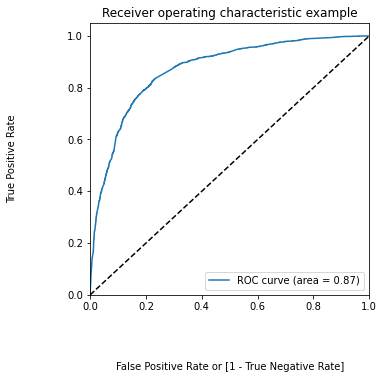

In [134]:
draw_roc( y_train_pred_f.Converted, y_train_pred_f.Converted_probability)

In [135]:
#Finding optimal Cutoff Point

In [136]:
numbers = [float(x)/10 for x in range(10)]    #different probability cut off 
for i in numbers:
    y_train_pred_f[i]=y_train_pred_f.Converted_probability.map(lambda x: 1 if x > i else 0)
y_train_pred_f.head()

,Converted,Converted_probability,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.193037,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.029495,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.379980,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.883056,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.819253,7987,1,1,1,1,1,1,1,1,1,1,0


In [137]:
# calculating accuracy, sensitivity, and specificity at different probability cut-off values

In [138]:
cut_off = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_f.Converted, y_train_pred_f[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cut_off.loc[i] =[ i ,accuracy,sensi,speci]
print(cut_off)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.581956  0.971791  0.337772
0.2   0.2  0.728232  0.914554  0.611524
0.3   0.3  0.793733  0.833197  0.769014
0.4   0.4  0.805857  0.763287  0.832522
0.5   0.5  0.804283  0.683565  0.879898
0.6   0.6  0.793261  0.613246  0.906018
0.7   0.7  0.762400  0.480785  0.938796
0.8   0.8  0.736734  0.371627  0.965429
0.9   0.9  0.696741  0.236304  0.985147


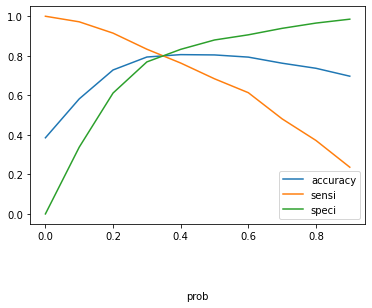

In [139]:
cut_off.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observation
From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [140]:
# Let us make the final prediction using 0.37 as the cut off

y_train_pred_f['Last_predicted'] = y_train_pred_f.Converted_probability.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_f.head()


,Converted,Converted_probability,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Last_predicted
0,0,0.193037,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.029495,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.379980,9226,0,1,1,1,1,0,0,0,0,0,0,1
3,1,0.883056,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.819253,7987,1,1,1,1,1,1,1,1,1,1,0,1


In [141]:
y_train_pred_f['Lead_Score'] = y_train_pred_f.Converted_probability.map(lambda x: round(x*100))
y_train_pred_f.head(15)

,Converted,Converted_probability,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Last_predicted,Lead_Score
0,0,0.193037,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.029495,1012,0,1,0,0,0,0,0,0,0,0,0,0,3
2,0,0.379980,9226,0,1,1,1,1,0,0,0,0,0,0,1,38
3,1,0.883056,4750,1,1,1,1,1,1,1,1,1,1,0,1,88
4,1,0.819253,7987,1,1,1,1,1,1,1,1,1,1,0,1,82
5,1,0.820548,1281,1,1,1,1,1,1,1,1,1,1,0,1,82
6,0,0.127262,2880,0,1,1,0,0,0,0,0,0,0,0,0,13
7,1,0.937642,4971,1,1,1,1,1,1,1,1,1,1,1,1,94
8,1,0.757002,7536,1,1,1,1,1,1,1,1,1,0,0,1,76
9,0,0.798756,1248,1,1,1,1,1,1,1,1,1,0,0,1,80


In [142]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of last predicted conversion / non conversion counts from the actual converted rates

checking = y_train_pred_f.loc[y_train_pred_f['Converted']==1,['Converted','Last_predicted']]
checking['Last_predicted'].value_counts()

1    1935
0     511
Name: Last_predicted, dtype: int64

In [143]:
# check the precentage of last_predicted conversions

1979/float(1979+467)

0.8090760425183974

### Observation

Last  prediction of conversions have a target of 80%  conversion as per the X Educations CEO's requirement . Hence this is a good model.

# 10 Model Evaluation And Prediction

### 10.1 Model Evaluation 

In [144]:
# Let's check the overall accuracy.


In [145]:
confusion2 = metrics.confusion_matrix(y_train_pred_f.Converted, y_train_pred_f.Last_predicted )
confusion2

array([[3151,  754],
       [ 511, 1935]], dtype=int64)

In [146]:
print('Accuracy :',metrics.accuracy_score(y_train_pred_f.Converted, y_train_pred_f.Last_predicted))
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity : ",TN / float(TN+FP))
print("False Positive Rate :",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print ("Negative predictive value :",TN / float(TN+ FN))

Accuracy : 0.8008187686978429
Sensitivity :  0.6835650040883074
Specificity :  0.8798975672215109
False Positive Rate : 0.12010243277848912
Positive Predictive Value : 0.780943484353106
Negative predictive value : 0.8161520190023753


### 10.2 Precesion And Recall

In [147]:
confusion = metrics.confusion_matrix(y_train_pred_f.Converted, y_train_pred_f.predicted )
confusion

array([[3436,  469],
       [ 774, 1672]], dtype=int64)

In [148]:
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.780943484353106


In [149]:
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.6835650040883074


In [150]:
# SKLearn untilies 

In [151]:
print("Precision :",precision_score(y_train_pred_f.Converted , y_train_pred_f.predicted))

Precision : 0.780943484353106


In [152]:
print("Recall :",recall_score(y_train_pred_f.Converted, y_train_pred_f.predicted))

Recall : 0.6835650040883074


### 10.3 Precision and recall tradeoff

In [153]:

y_train_pred_f.Converted, y_train_pred_f.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    0
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [154]:
p, r, thresholds = precision_recall_curve(y_train_pred_f.Converted, y_train_pred_f.Converted_probability)

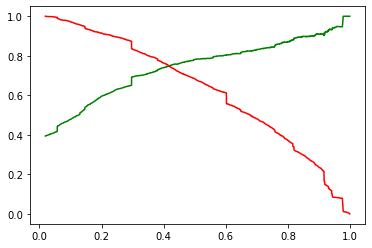

In [155]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Observation

Based on the Precision and Recall tradeoff, we got a cut off value of approximately 0.42

### 10.4  Making Prediction

In [156]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [157]:
X_test = X_test[cols]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
3271,0,0.4,0.100835,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1490,0,0.5,0.971741,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7936,0,0.2,0.047527,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4216,0,0.0,0.000000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3830,0,0.8,0.105331,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [158]:
# Adding a const
X_test_sm = sm.add_constant(X_test)


In [159]:
X_test_sm = sm.add_constant(X_test)
logm1 = sm.GLM(y_test,X_test_sm, family = sm.families.Binomial())
result = logm1.fit()


In [160]:
# Making predictions on the test set
y_test_prediction = result.predict(X_test_sm)
y_test_prediction[:10]

3271    0.133212
1490    0.975610
7936    0.101569
4216    0.809007
3830    0.182191
1800    0.757781
6507    0.323854
4821    0.226501
4223    0.963558
4714    0.353386
dtype: float64

In [161]:
y_prediction_1 = pd.DataFrame(y_test_prediction)          # Converting to a dataframe which is an array

In [162]:
y_prediction_1.head()

,0
3271,0.133212
1490,0.975610
7936,0.101569
4216,0.809007
3830,0.182191


In [163]:
y_test = pd.DataFrame(y_test)  # Converting y_test to dataframe

In [164]:
y_test['ID'] = y_test.index # Putting Prospect ID to index

In [165]:
y_prediction_1.reset_index(drop=True, inplace=True)   # Removing index for both dataframes to append them side by side 
y_test.reset_index(drop=True, inplace=True)


In [166]:
y_prediction_final = pd.concat([y_test, y_prediction_1],axis=1)  # Appending y_test and y_prediction_1


In [167]:
y_prediction_final.head()

,Converted,ID,0
0,0,3271,0.133212
1,1,1490,0.975610
2,0,7936,0.101569
3,1,4216,0.809007
4,0,3830,0.182191


In [168]:
y_prediction_final= y_prediction_final.rename(columns={ 0 : 'Converted_probability'}) #renaming column

y_prediction_final=y_prediction_final.reindex(columns=['ID','Converted','Converted_probability']) # Rearranging the columns


y_prediction_final.head() 

,ID,Converted,Converted_probability
0,3271,0,0.133212
1,1490,1,0.975610
2,7936,0,0.101569
3,4216,1,0.809007
4,3830,0,0.182191


In [169]:
y_prediction_final['final_predicted'] = y_prediction_final.Converted_probability.map(lambda x: 1 if x > 0.34 else 0)
y_prediction_final.head()

,ID,Converted,Converted_probability,final_predicted
0,3271,0,0.133212,0
1,1490,1,0.975610,1
2,7936,0,0.101569,0
3,4216,1,0.809007,1
4,3830,0,0.182191,0


In [170]:
#checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

In [171]:
check_test_df = y_prediction_final.loc[y_prediction_final['Converted']==1,['Converted','final_predicted']]
check_test_df['final_predicted'].value_counts()

1    787
0    202
Name: final_predicted, dtype: int64

In [172]:
# check the precentage of final_predicted conversions on test data

787/float(787+202)

0.7957532861476239

In [173]:
#checking accuracy sensitivity,Specificity 

In [174]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_prediction_final.Converted, y_prediction_final.final_predicted )
confusion2

array([[1409,  325],
       [ 202,  787]], dtype=int64)

In [175]:
print("Accuracy :",metrics.accuracy_score(y_prediction_final.Converted, y_prediction_final.final_predicted))
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity : ",TN / float(TN+FP))
print("False Positive Rate :",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print ("Negative predictive value :",TN / float(TN+ FN))

Accuracy : 0.8064634594197576
Sensitivity :  0.6835650040883074
Specificity :  0.8798975672215109
False Positive Rate : 0.12010243277848912
Positive Predictive Value : 0.780943484353106
Negative predictive value : 0.8161520190023753


In [176]:
#giving lead score

In [177]:
y_prediction_final['Lead_Score'] = y_prediction_final.Converted_probability.map( lambda x: round(x*100))

y_prediction_final.head()

,ID,Converted,Converted_probability,final_predicted,Lead_Score
0,3271,0,0.133212,0,13
1,1490,1,0.975610,1,98
2,7936,0,0.101569,0,10
3,4216,1,0.809007,1,81
4,3830,0,0.182191,0,18


In [178]:
hot_lead=y_prediction_final.loc[y_prediction_final["Lead_Score"]>=85]   #sorting with lead score more than 85 
hot_lead

,ID,Converted,Converted_probability,final_predicted,Lead_Score
1,1490,1,0.975610,1,98
8,4223,1,0.963558,1,96
16,1946,1,0.857290,1,86
21,2461,1,1.000000,1,100
23,5822,1,0.998187,1,100
...,...,...,...,...,...
2694,1566,1,0.977316,1,98
2699,6461,1,0.866663,1,87
2703,5741,1,0.901560,1,90
2715,6299,1,0.872160,1,87


In [179]:
print("The  ID of the customers which should be contacted are :")

hot_lead_id = hot_lead["ID"].values.reshape(-1)
hot_lead_id

The  ID of the customers which should be contacted are :


array([1490, 4223, 1946, 2461, 5822, 2684, 2010, 4062, 7696, 9049, 1518,
       4543, 4830, 4365, 3542, 7674, 8596, 4003, 4963, 6947, 4807,  446,
        789, 8372, 5805, 3758, 1561,  737, 9034, 6423, 8286, 7174, 4461,
       1436, 7552, 3932, 4080, 1475, 5785, 1867, 8189, 2860, 7253, 4297,
       5490, 1995, 6532, 4498, 5797, 8687, 7653,   76, 2018, 6743, 3976,
       5769, 1663, 3288, 8959, 7521, 6177, 8282, 6070, 7239, 8213, 9063,
       5292, 6913, 1481, 3265, 3285, 3858, 8106, 8207,  373, 7417, 4179,
       8568, 7268, 5141, 6784, 6754, 2960, 7753, 3983,  802, 4717,  505,
       8509, 6094, 4992, 7036, 2680,  112, 6149, 7175, 1675, 6999, 5826,
       6499, 2481, 3439, 4612, 4793, 2495,  822, 2600, 1030, 8111, 2378,
       7699, 5638, 2342, 8077, 2727,  720, 7489,  941, 2961, 1542, 5656,
       2630, 8205, 6332, 8461, 5135, 2427, 5087,  174, 2674, 8065, 1568,
       8597, 4708, 6066, 6538, 5700, 5815, 7970, 7902, 5804, 5042, 4081,
       6684, 1927, 5032, 5824,   64, 2650, 5808, 45

In [180]:
result.params.sort_values(ascending=False)

What is your current occupation_Housewife               23.868073
Last Notable Activity_Had a Phone Conversation          22.758920
Lead Source_Welingak Website                            21.026236
Lead Origin_Lead Add Form                                3.182625
Total Time Spent on Website                              3.130341
What is your current occupation_Working Professional     1.887653
Last Activity_SMS Sent                                   1.263124
Last Activity_Had a Phone Conversation                   1.183953
Last Notable Activity_Unreachable                        0.798295
TotalVisits                                              0.700908
Last Activity_Unsubscribed                               0.130666
const                                                   -0.022418
Last Notable Activity_Modified                          -0.696474
What is your current occupation_Student                 -1.020163
Do Not Email                                            -1.060637
What is yo

# 11 Business Recomendation 

* The company should make calls to the leads who are the "Housewife" as they are more likely to get converted.
* The company should make calls to the leads who are the "Last Notable Activity_Had a Phone Conversation " as they are more likely to get converted.
* The company should make calls to the leads coming from the lead sources "Welingak Websites"  as these are more likely to get converted.
* The company should make calls to the leads who spent "Lead Origin_Lead Add Form"  as these are more likely to get converted.

* The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.
* The company should not make calls to the leads whose lead origin is "Referral Sites" as they are not likely to get converted.
